In [1]:
import numpy as np
import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.interpolate
import astropy.units as u
import astropy.constants

import simdata

%reload_ext autoreload
%autoreload 2
%load_ext line_profiler
from importlib import reload
from pprint import pprint
import vortector

running vortector
Each lower bound must be strictly less than each upper bound.
Each lower bound must be strictly less than each upper bound.
Each lower bound must be strictly less than each upper bound.
'sigma_fit_phi_y0'
CPU times: user 2.32 s, sys: 1.31 s, total: 3.63 s
Wall time: 3.06 s
vmax 4.993789138854634e-05


/home/rometsch/repo/vortector/vortector.py:1369: UserWarning: No contour levels were found within the data range.
  ax.contour(Xc, Yc, vort["mask_view"], levels=[0,1,2], linewidths=1, colors="white")


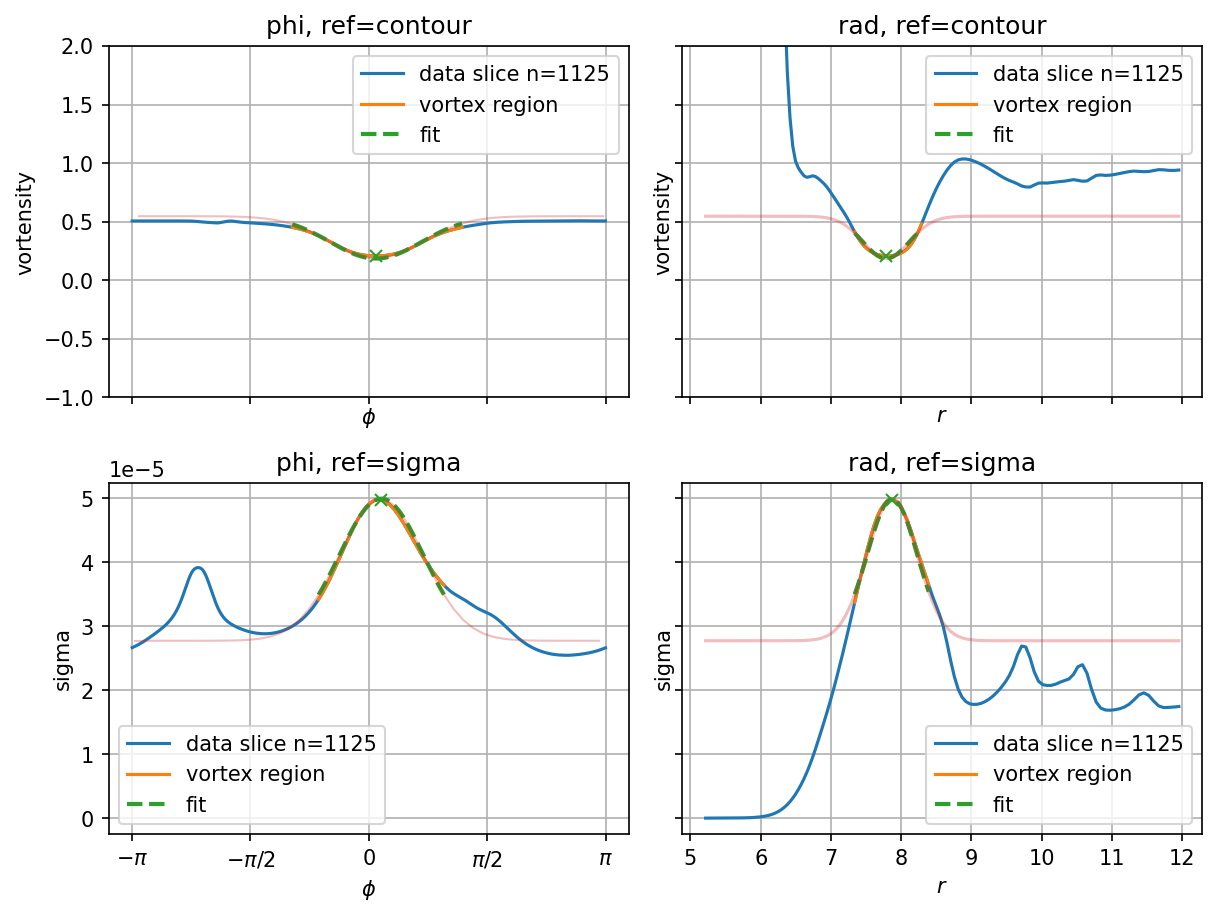

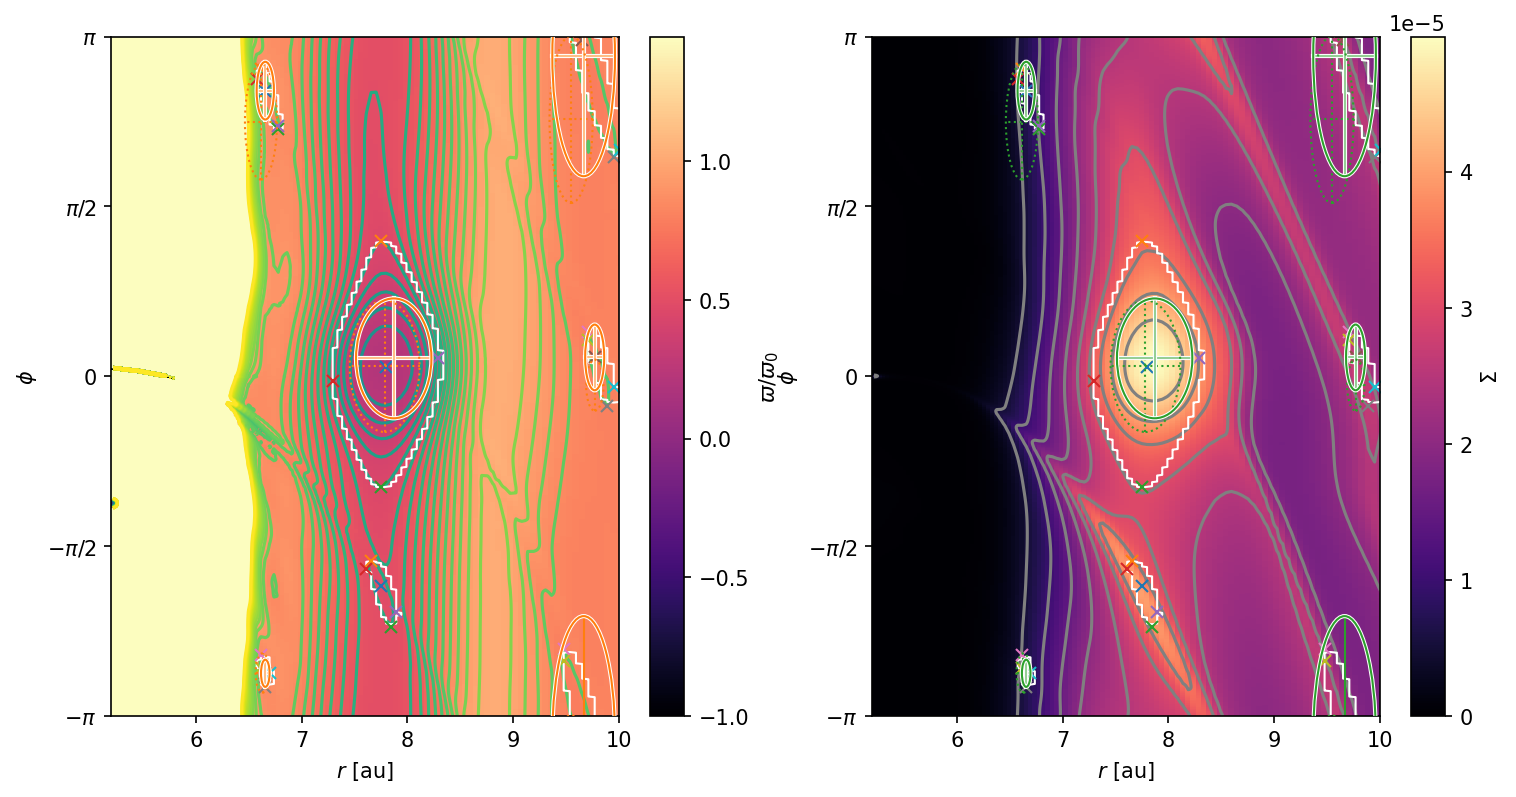

In [8]:
# very hard example overlapping with spiral arm

# simid = "4ae2169c"
# Noutput = 30

# hard example

# simid = "306d9f0c"
# Noutput = 52

# overlapping with boundary example

# simid = "9f976424"
# Noutput = 90

# spiral arm artifact

# simid = "487fa644"
# Noutput = 222

# big vortex example
# simid = "3625e016"
# Noutput = 200

# easy example

simid = "a122b63c"
Noutput = 75

# # faint vortex
# simid = "65a701a4"
# Noutput = 380

# another faint vortex
# simid = "b522b88a"
# Noutput = 116

# no vortex

# simid = "3401c4d0"
# Noutput = 256

# 8cps x 2cps example

# simid = "65a701a4"
# Noutput = 50

# 16 cps example
# simid = "20ce240c"
# Noutput = 82 # overlapping with spiral, need 0.2 spacing in vortensity
# Noutput = 83
# Noutput = 84 # hard case barely passing

# easier 16 cps example
# simid = "71cfb245"
# Noutput = 54

# transition disk example
# vortex in migration jump paper
# simid = "d132cf47"
# Noutput = 524

# multiple vortices example
# simid = "b522b88a"
# Noutput  = 40


simulation = simdata.SData(simid)

levels = [float(x) for x in np.arange(-1,1.5,0.05)]

if "run_vortector" in locals() and "calc_quantities" in locals():
    print("running vortector")
    X, Y, Xc, Yc, A, vortensity, vorticity, Rho, Rho_background = calc_quantities()
    run_vortector()

## Vorticity calculation for simdata

In [3]:
from simdata_vorticity import vorticity_simdata, map_angles
def calc_quantities():
    M_star = 1*u.solMass
    rho = simulation.fluids["gas"].get("2d", "mass density", Noutput)
    r = rho.grid.get_centers("r")
    phi = rho.grid.get_interfaces("phi")
    phi = map_angles(phi.to_value("rad"))
    if np.isclose(phi[-1],-np.pi):
        phi[-1] = np.pi
    phi = phi*u.rad
    PHI_rho, R_rho = np.meshgrid(phi, r)
    x_rho = R_rho*np.cos(PHI_rho)
    y_rho = R_rho*np.sin(PHI_rho)
    phi_c = rho.grid.get_centers("phi")
    phi_c = map_angles((phi_c).to_value("rad"))
    if phi_c[-1] == 0.0:
        phi_c[-1] = 2*np.pi
    phi_c = phi_c*u.rad
    PHI_c, R_c = np.meshgrid(phi_c, r)
    xc = R_c*np.cos(PHI_c)
    yc = R_c*np.sin(PHI_c)

    dr = rho.grid.get_sizes("r").to_value("au")
    dphi = rho.grid.get_sizes("phi").to_value("rad")
    DPHI, DR = np.meshgrid(dphi, dr)

    vorticity = vorticity_simdata(simulation, Noutput)
    Omega_Kepler = np.sqrt(astropy.constants.G * M_star / R_c**3).decompose()
    vorticity_Kepler = (0.5*Omega_Kepler).to("1/s")
    vorticity = vorticity.to_value(1/u.s)
    vorticity = (vorticity/vorticity_Kepler).decompose().value

    Rho_background = simulation.fluids["gas"].get("2d", "mass density", 0).data.to_value("solMass/au2")
    Rho = simulation.fluids["gas"].get("2d", "mass density", Noutput).data.to_value("solMass/au2")
    vortensity = vorticity/rho.data.to_value("solMass/au2")*Rho_background

    vortensity[vortensity < -1] = -1

    X = R_rho.to_value("au")
    Y = PHI_rho.to_value("rad")
    Xc = R_c.to_value("au")
    Yc = PHI_c.to_value("rad")
    R = Xc
    A = DR*R*DPHI

    N_roll = -np.argmax(phi[1:] - phi[:-1] < 0)
    X = np.roll(X, N_roll, axis=1)
    Y = np.roll(Y, N_roll, axis=1)
    Xc = np.roll(Xc, N_roll, axis=1)
    Yc = np.roll(Yc, N_roll, axis=1)
    vorticity = np.roll(vorticity, N_roll, axis=1)
    vortensity = np.roll(vortensity, N_roll, axis=1)
    Rho = np.roll(Rho, N_roll, axis=1)
    Rho_background = np.roll(Rho_background, N_roll, axis=1)
    return X, Y, Xc, Yc, A, vortensity, vorticity, Rho, Rho_background

X, Y, Xc, Yc, A, vortensity, vorticity, Rho, Rho_background = calc_quantities()

Each lower bound must be strictly less than each upper bound.
'sigma_fit_phi_y0'
Each lower bound must be strictly less than each upper bound.
'sigma_fit_phi_y0'
Each lower bound must be strictly less than each upper bound.
'sigma_fit_phi_y0'
Each lower bound must be strictly less than each upper bound.
'sigma_fit_phi_y0'
Each lower bound must be strictly less than each upper bound.
'sigma_fit_phi_y0'
Each lower bound must be strictly less than each upper bound.
'sigma_fit_phi_y0'
CPU times: user 2.99 s, sys: 1.45 s, total: 4.44 s
Wall time: 3.39 s
vmax 4.517722124811731e-05


/home/rometsch/repo/vortector/vortector.py:1369: UserWarning: No contour levels were found within the data range.
  ax.contour(Xc, Yc, vort["mask_view"], levels=[0,1,2], linewidths=1, colors="white")


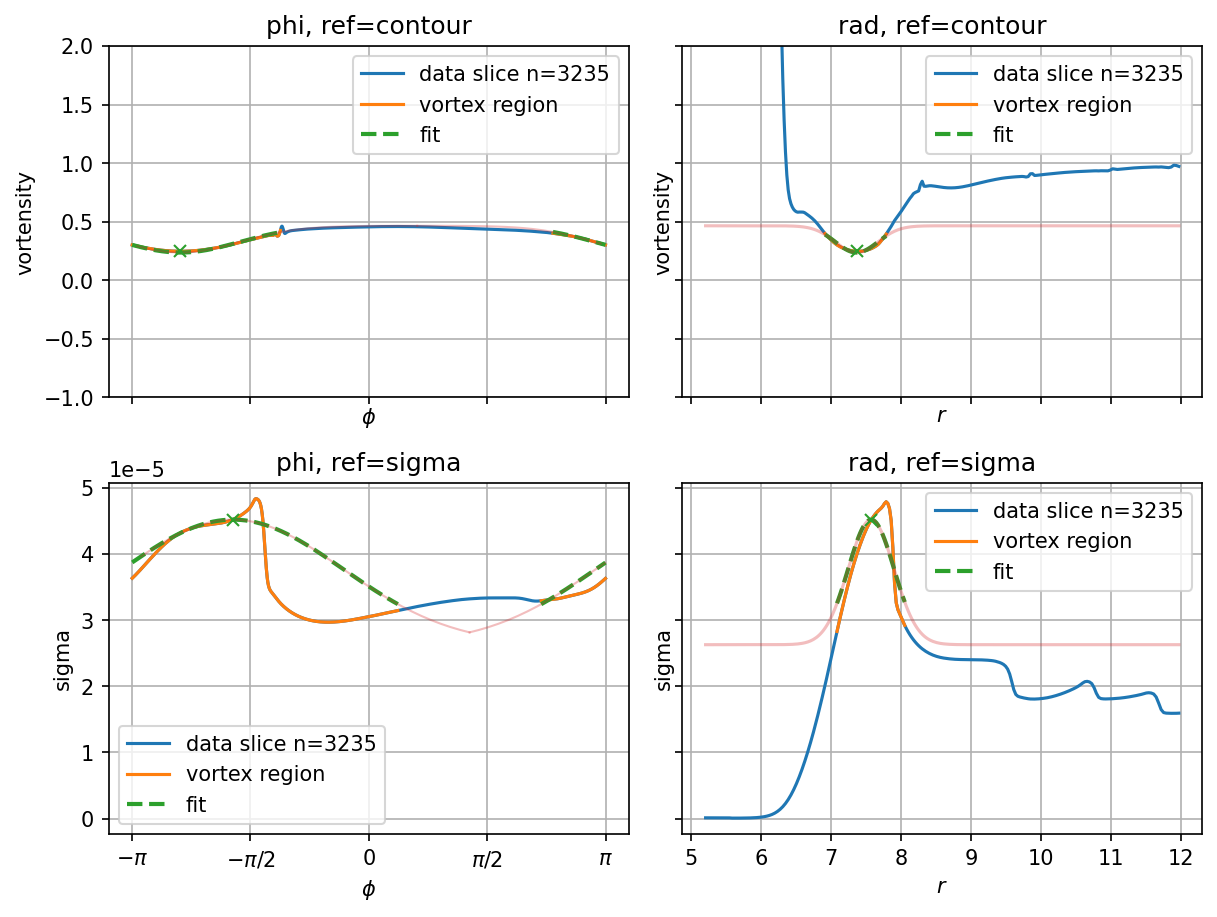

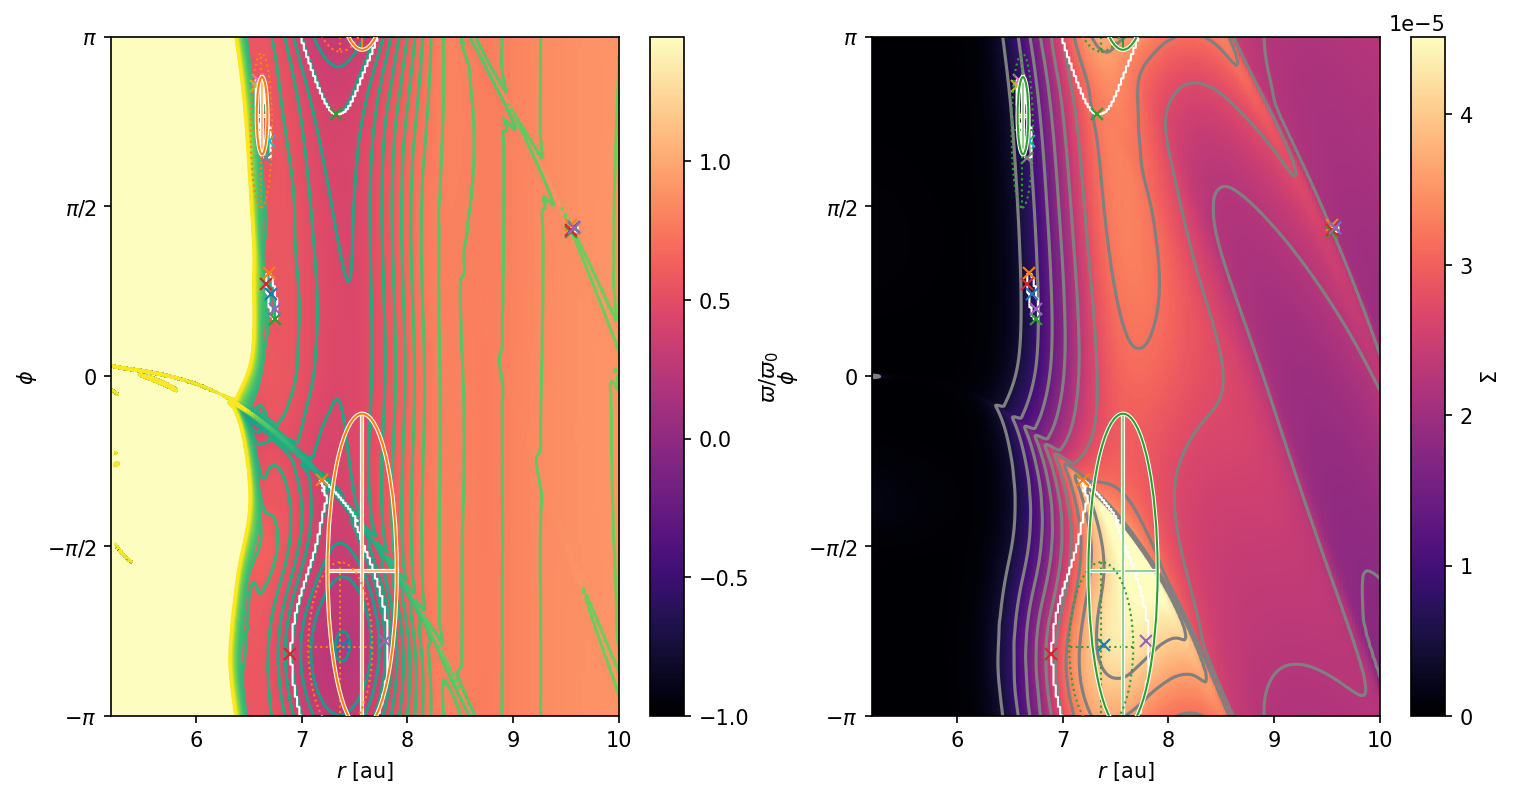

In [4]:
vd = vortector.Vortector(Xc, Yc, A, vortensity, Rho, Rho_background,
                         [5.2,12], verbose=False, med=0.15, mear=np.inf,
                         levels=levels
                        )
# vd = vortector.Vortector(Xc, Yc, A, vortensity, Rho, Rho_background,
#                          [40,80], verbose=False, med=0.15, mear=np.inf,
#                          levels=levels
#                         )
%time vortices = vd.detect_vortex(include_mask=True)
for v in vortices:
    try:
        v["strength"] = np.exp(-v["vortensity_median"])*v["mass"]
        print("strength = {:.2e}, mass = {:.2e} , min vort = {:.3f}, sigma fit r_diff = {:.2e} phi_diff = {:.2e}".format(
            v['strength'],v['mass'],v['vortensity_min'],v["sigma_fit_r_reldiff"],v["sigma_fit_phi_reldiff"]))
        print(f"    contour diff 2D = {v['sigma_fit_contour_diff_2D']:.2e} , contour reldiff 2D = {v['sigma_fit_contour_reldiff_2D']:.2e}")
        print(f"    ellipse diff 2D = {v['sigma_fit_ellipse_diff_2D']:.2e} , ellipse reldiff 2D = {v['sigma_fit_ellipse_reldiff_2D']:.2e}")
        print(f"    area_ratio_ellipse_to_contour = {v['sigma_fit_area_ratio_ellipse_to_contour']:.2e}")
    except KeyError:
        pass
    
vd.show_fit_overview_1D(0)
vd.show_fit_overview_2D()

In [54]:
vortices[0]

{'n': 3162,
 'bottom_extended': (734, 3104),
 'top_extended': (723, 2919),
 'left_extended': (540, 2992),
 'right_extended': (889, 3027),
 'mask_view': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 'bottom_view': (104, 2016),
 'bottom': (632, 2016),
 'top_view': (103, 153),
 'top': (631, 153),
 'left_view': (77, 80),
 'left': (605, 80),
 'right_view': (127, 45),
 'right': (655, 45),
 'mass': 0.0001336009892691815,
 'mass_background': 6.871397158200728e-05,
 'mass_enhancement': 6.488701768717421e-05,
 'vortensity_mean': 0.05830535169609417,
 'vortensity_median': 0.06250070703027266,
 'vortensity_min': -0.0066713865398692245,
 'vortensity_max': 0.11822645556933976,
 'sigma_mean': 4.

## Test vortector class implementation

In [7]:
def run_vortector():
    vd = vortector.Vortector(Xc, Yc, A, vortensity, Rho, Rho_background,
                             [5.2,12], verbose=False, med=0.15, mear=np.inf,
                             levels=levels
                            )
    # vd = vortector.Vortector(Xc, Yc, A, vortensity, Rho, Rho_background,
    #                          [40,80], verbose=False, med=0.15, mear=np.inf,
    #                          levels=levels
    #                         )
    %time vortices = vd.detect_vortex(include_mask=True)
    for v in vortices:
        try:
            v["strength"] = np.exp(-v["vortensity_median"])*v["mass"]
            print("strength = {:.2e}, mass = {:.2e} , min vort = {:.3f}, sigma fit r_diff = {:.2e} phi_diff = {:.2e}".format(
                v['strength'],v['mass'],v['vortensity_min'],v["sigma_fit_r_reldiff"],v["sigma_fit_phi_reldiff"]))
            print(f"    contour diff 2D = {v['sigma_fit_contour_diff_2D']:.2e} , contour reldiff 2D = {v['sigma_fit_contour_reldiff_2D']:.2e}")
            print(f"    ellipse diff 2D = {v['sigma_fit_ellipse_diff_2D']:.2e} , ellipse reldiff 2D = {v['sigma_fit_ellipse_reldiff_2D']:.2e}")
            print(f"    area_ratio_ellipse_to_contour = {v['sigma_fit_area_ratio_ellipse_to_contour']:.2e}")
        except KeyError:
            pass


    vd.show_fit_overview_1D(0)
    vd.show_fit_overview_2D()


'mask'
CPU times: user 2.84 s, sys: 1.8 s, total: 4.64 s
Wall time: 4.62 s


Text(0.5, 1.0, 'phi, ref=sigma')

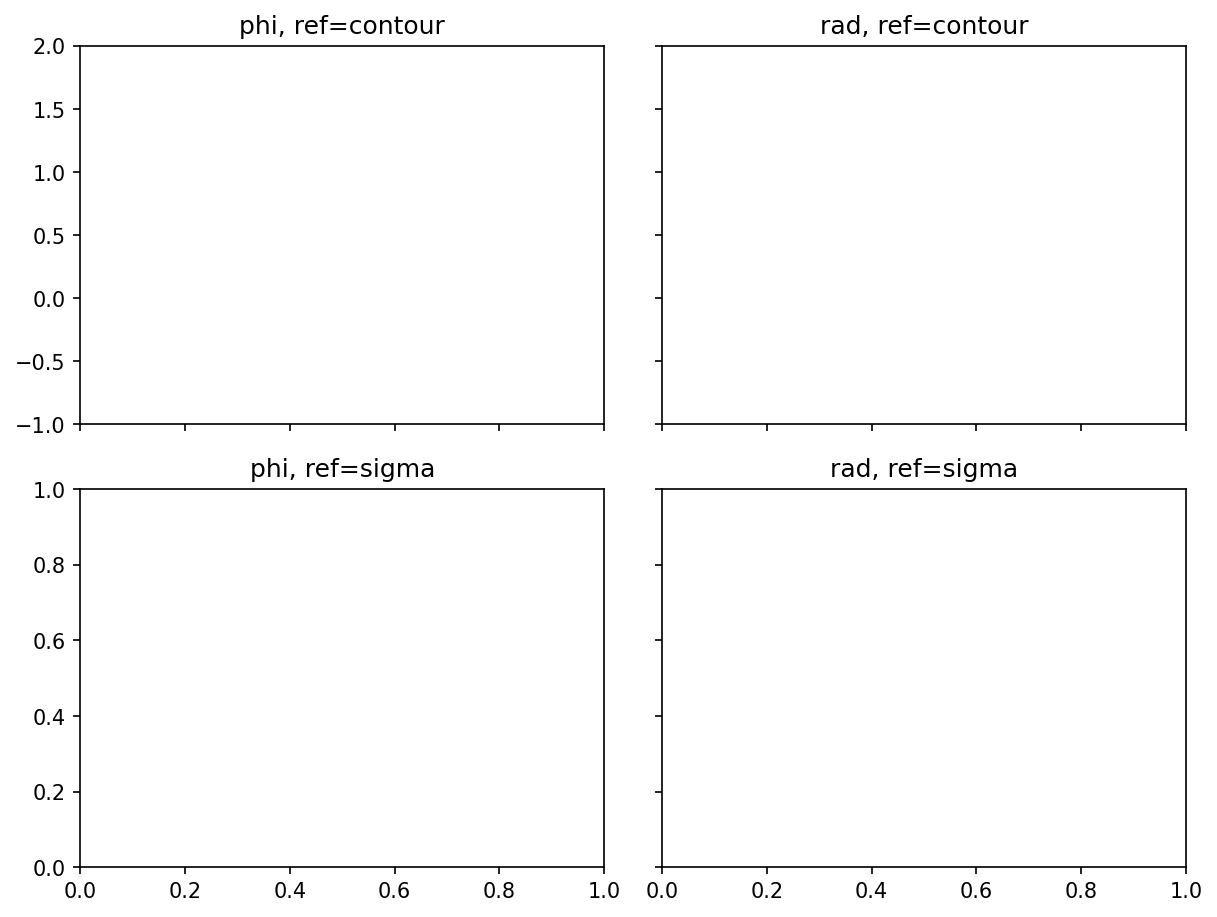

In [48]:
# def run_vortector():
vd = vortector.Vortector(Xc, Yc, A, vortensity, Rho, Rho_background,
                         [5.2,12], verbose=False, med=0.15, mear=np.inf,
                         levels=levels
                        )
# vd = vortector.Vortector(Xc, Yc, A, vortensity, Rho, Rho_background,
#                          [40,80], verbose=False, med=0.15, mear=np.inf,
#                          levels=levels
#                         )
%time vortices = vd.detect_vortex(include_mask=True)
for v in vortices:
    try:
        v["strength"] = np.exp(-v["vortensity_median"])*v["mass"]
        print("strength = {:.2e}, mass = {:.2e} , min vort = {:.3f}, sigma fit r_diff = {:.2e} phi_diff = {:.2e}".format(
            v['strength'],v['mass'],v['vortensity_min'],v["sigma_fit_r_reldiff"],v["sigma_fit_phi_reldiff"]))
        print(f"    contour diff 2D = {v['sigma_fit_contour_diff_2D']:.2e} , contour reldiff 2D = {v['sigma_fit_contour_reldiff_2D']:.2e}")
        print(f"    ellipse diff 2D = {v['sigma_fit_ellipse_diff_2D']:.2e} , ellipse reldiff 2D = {v['sigma_fit_ellipse_reldiff_2D']:.2e}")
        print(f"    area_ratio_ellipse_to_contour = {v['sigma_fit_area_ratio_ellipse_to_contour']:.2e}")
    except KeyError:
        pass

# pprint(vortices)

fig, axes = plt.subplots(2,2, dpi=150, figsize=(8,6), constrained_layout=True, sharex="col", sharey="row")
axes = axes.flatten()
ax = axes[1]
key = "vortensity"
ref = "contour"
vd.show_radial_fit(ax, key, 0, ref=ref)
ax.set_title(f"rad, ref={ref}")
ax.set_ylim(-1, 2)

ax = axes[0]
vd.show_azimuthal_fit(ax, key, 0, ref=ref)
ax.set_title(f"phi, ref={ref}")
ax.set_ylim(-1, 2)

# fig, axes = plt.subplots(1,2, dpi=150, figsize=(8,3), constrained_layout=True)
# axes = axes.flatten()
# print(type(axes))
ax = axes[3]
key = "sigma"
ref = "sigma"
center = "sigma"
vd.show_radial_fit(ax, key, 0, ref=ref, center=center)
ax.set_title(f"rad, ref={ref}")

ax = axes[2]
vd.show_azimuthal_fit(ax, key, 0, ref=ref, center=center)
ax.set_title(f"phi, ref={ref}")

# return vortices


Plot vortensity

In [6]:
xlims = [5.2, 10]

<ipython-input-7-f43c07e51f5a>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = ax.pcolormesh(X,Y,Z,cmap=cmap,norm=norm)


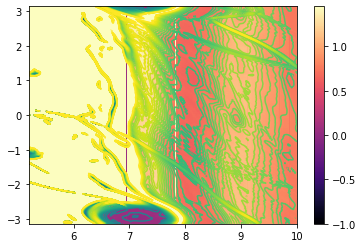

In [7]:
fig, ax = plt.subplots()
Z = vortensity
cmap = "magma"
norm = colors.Normalize(vmin=levels[0], vmax=levels[-1])
img = ax.pcolormesh(X,Y,Z,cmap=cmap,norm=norm)
ax.set_xlim(xlims)
ax.contour(Xc, Yc, vortensity, levels=levels)

cbar = fig.colorbar(img, ax=ax)

Detect vortex

f_Sigma 2.0
threshold 0.3


<ipython-input-8-1dcec9426774>:48: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = ax.pcolormesh(X,Y,vortensity,cmap=cmap,norm=norm)


argmin ind 1288264 inds (629, 72) x 7.0854144179175265 y -2.920699420134 Zmin -0.006529889365981686
normalized Z -0.004981506666724807
ratio rho_avg / rho0 0.7628776519058068
ratio rho_max / rho0 2.4917967851803757


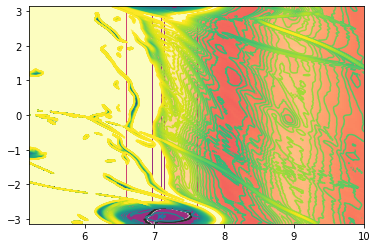

In [8]:
rmin = 5.2
rmax = 10

mask_loc_inner = Xc < rmin
mask_loc_outer = Xc > rmax
mask_loc = np.logical_or(mask_loc_inner, mask_loc_outer)


n_overshoot_vort = 2
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


n_overshoot_Sigma = 2
f_Sigmas = [2.0, 1.9, 1.8, 1.7, 1.6, 1.5]

for vorticity_th in thresholds:
    mask_vorticity = vorticity > vorticity_th
    for f_Sigma in f_Sigmas:
        mask_dens = Rho < f_Sigma * Rho_background
        mask = np.logical_or(mask_loc, mask_dens)
        mask = np.logical_or(mask, mask_vorticity)
        if np.sum(mask == 0) < 1000:
            continue
        else:
            if n_overshoot_Sigma <= 0:
                break
            else:
                n_overshoot_Sigma -= 1
                continue
    if np.sum(mask == 0) > 0:
        if n_overshoot_vort <= 0:
            print("f_Sigma",f_Sigma)
            print("threshold", vorticity_th)
            break
        else:
            n_overshoot_vort -= 1

vals = np.ma.masked_array(vortensity, mask=mask)

Zmin = np.min(vals)

ind = np.argmin(vals, axis=None)
inds = np.unravel_index(ind, vals.shape)
x = X[inds]
y = Y[inds]

fig, ax = plt.subplots()
img = ax.pcolormesh(X,Y,vortensity,cmap=cmap,norm=norm)
ax.contour(Xc, Yc, mask, cmap="Greys")
ax.contour(Xc, Yc, vortensity, levels=levels)

print("argmin", "ind", ind, "inds", inds, "x", x, "y", y, "Zmin", Zmin)
ax.plot(x, y, "x")
ax.set_xlim(xlims)

ix = inds[0]
iy = inds[1]
rho_avg = np.average(Rho[ix, :])
rho_max = np.max(Rho[ix, :])
rho0 = np.average(Rho_background[ix, :])

print("normalized Z", Zmin * rho_avg / rho0)
print("ratio rho_avg / rho0", rho_avg / rho0)
print("ratio rho_max / rho0", rho_max / rho0)

Detect closed regions in the contour plot

In [9]:
Rc = Xc
view_min = np.argmin(Rc[:,0] < xlims[0])
view_max = np.argmin(Rc[:,0] < xlims[1])
print(view_min, view_max)

528 743


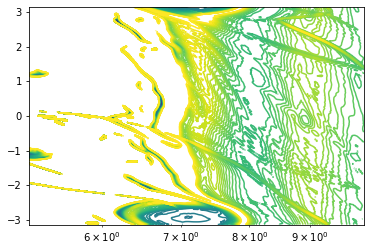

In [10]:
fig, ax = plt.subplots()
vmi = view_min
vma = view_max
img = ax.contour(Xc[vmi:vma,:], Yc[vmi:vma,:], vortensity[vmi:vma,:], levels=levels)
ax.set_xscale("log")

Make an image out of the contour lines

In [11]:
def fig2rgb_array(fig):
    fig.canvas.draw()
    buf = fig.canvas.tostring_rgb()
    ncols, nrows = fig.canvas.get_width_height()
    return np.fromstring(buf, dtype=np.uint8).reshape(nrows, ncols, 3)

In [12]:
vmi = view_min
vma = view_max
data_view = vortensity[vmi:vma,:]

Nx, Ny = data_view.shape
int_aspect = int(np.max([Nx/Ny, Ny/Nx]))

if int_aspect >= 2:
    if Nx < Ny:
        CNx = int_aspect*Nx
        CNy = Ny
    else:
        CNx = Nx
        CNy = int_aspect*Ny

if min(CNx, CNy) < 1000:
    supersample = int(np.ceil(1000/min(CNx, CNy)))
else:
    supersample = 1

CNx *= supersample
CNy *= supersample
        
print(f"Nx {Nx}, Ny {Ny}, int_aspect {int_aspect}, supersample {supersample}, CNx {CNx}, CNy {CNy}")
        
fig = plt.figure(frameon=False, figsize=(CNx,2*CNy), dpi=1)
#fig.set_size_inches(w,h)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

def periodically_extend(arr):
    Hhalf = int(arr.shape[1]/2)
    rv = np.concatenate(
        [arr[:,Hhalf:],
         arr,
         arr[:,:Hhalf]],
        axis=1
    )
    return rv
Zpe = periodically_extend(vortensity[vmi:vma,:])
Xpe = periodically_extend(Xc[vmi:vma,:])
Ype = periodically_extend(Yc[vmi:vma,:])

img = ax.contour(Zpe.transpose()
                 ,levels=levels, linewidths=CNx/1000, antialiased=False)

# ax.set_xlim(xlims)

# img = ax.contour(Xc[vmi:vma,:], Yc[vmi:vma,:], vortensity[vmi:vma,:]
#                  , levels=levels, linewidths=CNx/1000)

# ax.set_xscale("log")

# fig.canvas.draw()
# img_data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
# img_data = img_data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
# img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2GRAY)
img_data = fig2rgb_array(fig)
img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2GRAY)
plt.close(fig)

Nx 215, Ny 2048, int_aspect 9, supersample 1, CNx 1935, CNy 2048


<ipython-input-11-669bc3611ab9>:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  return np.fromstring(buf, dtype=np.uint8).reshape(nrows, ncols, 3)


In [13]:
img_data.shape

(4096, 1935)

## Threshold contour image for full contrast

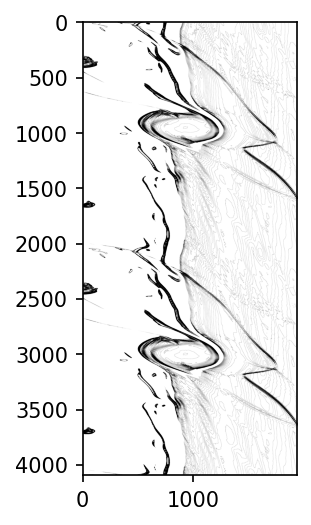

In [14]:
ret,thresh = cv2.threshold(img_data,250,255,0)
fig, ax = plt.subplots(dpi=150)
ax.imshow(thresh, cmap="Greys_r")

## Extract contours and construct hierarchy

In [15]:
# contours, hierarchy = cv2.findContours(
#         img_data, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours, hierarchy = cv2.findContours(
        thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print("number of contours", len(contours))

contours_dict = { n : { "cnt" : cnt, "n" : n } for n, cnt in enumerate(contours) }

areas = [cv2.contourArea(c) for c in contours]
for n, d in enumerate(contours_dict.values()):
    d["area"] = areas[n]

sort_inds = np.argsort(areas)
ind_max = sort_inds[-1]
cnt_max = contours[ind_max]
contours_sorted = [contours_dict[i] for i in sort_inds]

# take the up to 100 largest patches
contours_largest = [contours_dict[i] for i in [n for n in sort_inds[::-1]][:100]]

number of contours 12866


## Extract closed contours

In [16]:
aspect_ratio_max = np.inf

contours_convex = []
for n, contour in enumerate(contours_largest):
    cnt = contour["cnt"]
    l = cv2.arcLength(cnt,True)
    contour["arcLength"] = l
    a = contour["area"]
    leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
    rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
    topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
    bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])
    dx = rightmost[0] - leftmost[0]
    dy = bottommost[1] - topmost[1]
    
    Nh = int(thresh.shape[0]/2)
    Nq = int(thresh.shape[0]/4)
    
    # sort out mirrors of contours fully contained in original area
    if bottommost[1] < Nq or topmost[1] > 3*Nq:
        continue

    is_not_too_elongated = dx >0 and dy >0 and max(dx/dy, dy/dx) < aspect_ratio_max
    is_area_larget_delimiter = l  > 0 and a > l
    is_not_spanning_whole_height = dy < 0.5*0.95*thresh.shape[0]

    if not(is_not_too_elongated and is_area_larget_delimiter and is_not_spanning_whole_height):
        continue
    
#     contours_convex.append(contour)
#     continue
    
    # sort out the lower of mirror images
    bounding_hor = np.array([ rightmost[0], leftmost[0]] )
    bounding_vert = np.array([ topmost[1], bottommost[1] ])
    contour["bottom_extended"] = bottommost
    contour["top_extended"] = topmost
    contour["left_extended"] = leftmost
    contour["right_extended"] = rightmost
    contour["bounding_hor"] = bounding_hor
    contour["bounding_vert"] = bounding_vert
    
    to_del = None
    found_mirror = False
    for k,c in enumerate(contours_convex):
        same_hor = (bounding_hor == c["bounding_hor"]).all()
        same_vert = (np.abs(bounding_vert % Nh - c["bounding_vert"] % Nh) < 20).all()
        if same_hor and same_vert:
            if bounding_vert[1] > c["bounding_vert"][1]:
                to_del = k
            found_mirror = True
            break
    
    if found_mirror:
        if to_del is not None:
            del contours_convex[to_del]
            contours_convex.append(contour)
    else:
        contours_convex.append(contour)
    
    
print("number of convex contours", len(contours_convex))

print([c["area"] for c in contours_convex])

# cv2.drawContours(dst, contours, -1, (255, 255, 0), -1)
# cv2.drawContours(dst, contours_convex, -1, (255, 255, 0), -1)

number of convex contours 49
[198996.5, 167909.5, 93967.5, 75178.5, 60794.5, 59507.0, 58899.5, 49723.0, 49441.5, 46879.5, 46787.5, 43992.0, 28407.0, 28317.5, 27810.5, 27779.5, 25706.5, 25289.5, 24747.5, 24567.0, 24235.5, 23205.0, 22568.5, 21433.5, 20426.5, 20146.5, 19669.5, 19428.5, 16704.0, 16700.5, 16222.5, 15315.5, 14562.5, 14558.5, 14480.5, 14262.0, 13484.0, 13267.5, 12646.5, 12535.5, 12306.0, 12161.5, 12092.5, 11682.5, 11510.5, 11139.5, 10818.5, 10641.0, 10019.0]


In [17]:
max_ellipse_deviation = 0.15

candidates = {}
for contour in contours_convex:
    cnt = contour["cnt"]
    ellipse = cv2.fitEllipse(cnt)
    
    im_shape = np.zeros(thresh.shape)
    cv2.drawContours(im_shape, [cnt], 0, (255, 255, 255), -1)

    im_ellipse = np.zeros(thresh.shape)
    im_ellipse = cv2.ellipse(im_ellipse,ellipse,(255,255,255),-1)
    
    difference = np.abs(im_shape - im_ellipse)
    difference_area = np.sum(difference/255)
    
    rel_delta = difference_area / contour["area"]
    
    
    if rel_delta > max_ellipse_deviation:
        continue
    
    contour["mask_extended"] = im_shape
    candidates[contour["n"]] = contour
    
    
#     fig, ax = plt.subplots(figsize=(6,4), dpi=150)
#     im = np.zeros(list(thresh.shape) + [3])
#     cv2.drawContours(im, [cnt], 0, (255, 255, 255), -1)
    
#     im = cv2.ellipse(im,ellipse,(255,0,0),4)
#     ax.imshow(im, cmap = 'gray', interpolation = 'bicubic')
    
#     n = contour["n"]
#     ax.set_title(f"{n}, delta area = {difference_area}, rel delta area {rel_delta:.3f}")

print([c["area"] for c in candidates.values()])

[60794.5]


(930, 2919) (943, 3106)


Text(0.5, 1.0, 'mask_reduced (2048, 1935)')

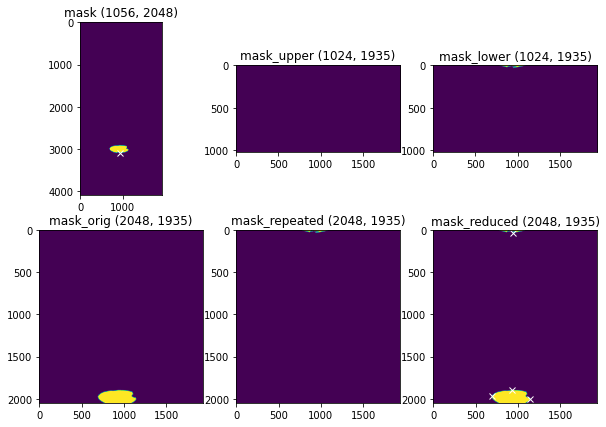

In [18]:
candidate_list = [c for c in candidates.values()]
c = candidate_list[0]
mask_extended = c["mask_extended"]
# reduce back to normal image size
Nh = int(mask_extended.shape[0]/2)
Nq = int(mask_extended.shape[0]/4)
mask_lower = mask_extended[3*Nq:, :]
mask_upper = mask_extended[:Nq, :]
mask_repeated = np.concatenate([mask_lower, mask_upper])
mask_orig = mask_extended[Nq:3*Nq, :]
mask_reduced = np.logical_or(mask_orig, mask_repeated)

cnt = c["cnt"]
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

print(topmost, bottommost)

fig, axes = plt.subplots(2,3, figsize=(10,7))
axes = axes.ravel()

axes[0].imshow(mask_extended)
x = bottommost[0]
y = bottommost[1]
axes[0].plot([x],[y], "x", color="white")


axes[1].imshow(mask_upper)
axes[2].imshow(mask_lower)
axes[3].imshow(mask_orig)
axes[4].imshow(mask_repeated)

def map_ext_pnt_to_orig(pnt):
    x = pnt[0]
    y = pnt[1]
    if y > Nq and y <= 3*Nq:
        y -= Nq
    elif y < Nq:
        y += Nq
    elif y > 3*Nq:
        y -= 3*Nq
    return (x,y)
    
axes[5].imshow(mask_reduced)
x, y = map_ext_pnt_to_orig(bottommost)
axes[5].plot([x],[y], "x", color="white")
x, y = map_ext_pnt_to_orig(topmost)
axes[5].plot([x],[y], "x", color="white")
x, y = map_ext_pnt_to_orig(leftmost)
axes[5].plot([x],[y], "x", color="white")
x, y = map_ext_pnt_to_orig(rightmost)
axes[5].plot([x],[y], "x", color="white")


# set titles
axes[0].set_title(f"mask {mask.shape}")
axes[1].set_title(f"mask_upper {mask_upper.shape}")
axes[2].set_title(f"mask_lower {mask_lower.shape}")
axes[3].set_title(f"mask_orig {mask_orig.shape}")
axes[4].set_title(f"mask_repeated {mask_repeated.shape}")
axes[5].set_title(f"mask_reduced {mask_reduced.shape}")

## Transform the image from ellipse fitting images back to match the grid

In [19]:
Nh = int(mask_extended.shape[0]/2)
Nq = int(mask_extended.shape[0]/4)
def map_ext_pnt_to_orig(pnt):
    x = pnt[0]
    y = pnt[1]
    if y > Nq and y <= 3*Nq:
        y -= Nq
    elif y < Nq:
        y += Nq
    elif y > 3*Nq:
        y -= 3*Nq
    return (x,y)

for contour in candidates.values():
    mask_extended = contour["mask_extended"]
    # reduce back to normal image size
    Nh = int(mask_extended.shape[0]/2)
    Nq = int(mask_extended.shape[0]/4)
    mask_lower = mask_extended[3*Nq:, :]
    mask_upper = mask_extended[:Nq, :]
    mask_repeated = np.concatenate([mask_lower, mask_upper])
    mask_orig = mask_extended[Nq:3*Nq, :]
    mask_reduced = np.logical_or(mask_orig, mask_repeated)
    
    # fit back to original data shape
    mask = mask_reduced.transpose()[:,::-1]
    mask = mask[::supersample,::supersample]
    if int_aspect >= 2:
        if Nx < Ny:
            mask = mask[::int_aspect,:]
        else:
            mask = mask[:,::int_aspect]
    mask = np.array(mask, dtype=bool)
    contour["mask"] = mask
    
    for key in ["bottom", "top", "left", "right"]: 
        pnt = contour[key + "_extended"]
        x, y = map_ext_pnt_to_orig(pnt)
        y = Nh - y
        x /= supersample
        y /= supersample
        if Nx < Ny:
            x /= int_aspect
        else:
            y /= int_aspect
        x = int(x)
        y = int(y)
        contour[key + "_view"] = (x,y)
        contour[key] = (x + vmi, y)
        

## Calculate mass of cells

In [20]:
mass = A*Rho

mass_background = A*Rho_background

mass_view = mass[vmi:vma,:]
mass_background_view = mass_background[vmi:vma,:]
vortensity_view = vortensity[vmi:vma,:]
vorticity_view = vorticity[vmi:vma,:]

Xc_view = Xc[vmi:vma,:]
Yc_view = Yc[vmi:vma,:]
Rho_view = Rho[vmi:vma,:]

## Show the candidates

<ipython-input-21-cbb0d62cadf6>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = ax.pcolormesh(Xc_view, Yc_view/np.pi, vortensity_view,cmap=cmap,norm=norm, rasterized=True)


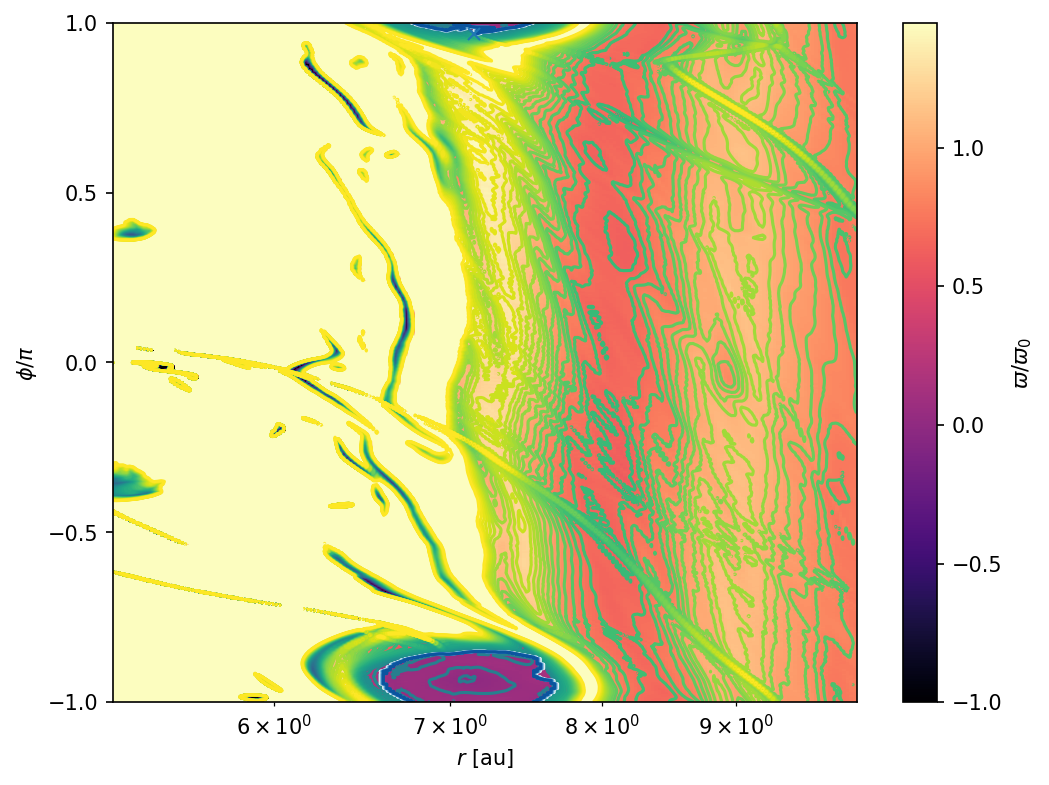

In [21]:
fig, ax = plt.subplots(figsize=(8,6),dpi=150)
ax.set_xscale("log")

Z = vortensity
cmap = "magma"
norm = colors.Normalize(vmin=levels[0], vmax=levels[-1])
img = ax.pcolormesh(Xc_view, Yc_view/np.pi, vortensity_view,cmap=cmap,norm=norm, rasterized=True)

ax.contour(Xc_view, Yc_view/np.pi, vortensity_view, levels=levels)

for n, contour in enumerate(candidates.values()):
    cmap = "Blues" if n==1 else "Greys"
    ax.contour(Xc_view, Yc_view/np.pi, contour["mask"], cmap="Blues")
    ix, iy = contour["bottom_view"]
    x = Xc_view[ix, iy]
    y = Yc_view[ix, iy]
    ax.plot([x], [y/np.pi], "x")
    
ax.set_xlabel(r"$r$ [au]")
ax.set_ylabel(r"$\phi / \pi$")
ax.set_yticks([-1, -0.5, 0, 0.5, 1])

cbar = fig.colorbar(img, ax=ax)
cbar.set_label(r"$\varpi/\varpi_0$")

## Generate ancestor list 

The hierarchy generated by opencv in the contour finder outputs a list with the syntax
```
[Next, Previous, First_Child, Parent]
```
If any of those is not available its encoded  by -1.

In [22]:
for c in candidates.values():
    ancestors = []
    n_parent = c["n"]
    for n in range(1000):
        n_parent = hierarchy[0,n_parent,3]
        if n_parent == -1 or n_parent not in candidates:
            break
        ancestors.append(n_parent)
    c["ancestors"] = ancestors
    print(c["n"], ancestors)

3421 []


## Construct decendents from ancestor list
This is done to avoid causing trouble when an intermediate contour is missing.

In [23]:
decendents = {}
for c in candidates.values():
    ancestors = c["ancestors"]
    for k, n in enumerate(ancestors):
        if not n in decendents or len(decendents[n]) < k:
            decendents[n] = [i for i in reversed(ancestors[:k])]

for c in candidates.values():
    if c["n"] in decendents:
        dec = decendents[c["n"]]
    else:
        dec = []
    c["decendents"] = dec
    print(c["n"], dec)

3421 []


## Remove children from candidates 

In [24]:
decendents = []
for c in candidates.values():
    decendents += c["decendents"].copy()
decendents = set(decendents)
candidates_bak = candidates.copy()
for n in decendents:
    del candidates[n]

## Get the mass and vortensity inside the candidates

In [25]:
vortensity_area_view = A[vmi:vma]*vortensity[vmi:vma]


for contour in candidates.values():
    try:
        mask = contour["mask"]
        contour["mass"] = np.sum(mass_view[mask])
        contour["mass_background"] = np.sum(mass_background_view[mask])
        contour["mass_enhancement"] = contour["mass"] - contour["mass_background"]
        contour["vortensity_mean"] = np.mean(vortensity_view[mask])
        contour["vortensity_median"] = np.median(vortensity_view[mask])
        contour["vortensity_min"] = np.min(vortensity_view[mask])
        contour["vortensity_max"] = np.max(vortensity_view[mask])
        contour["sigma_mean"] = np.mean(Rho_view[mask])
        contour["sigma_median"] = np.median(Rho_view[mask])
        contour["sigma_min"] = np.min(Rho_view[mask])
        contour["sigma_max"] = np.max(Rho_view[mask])
        
        
        contour["rmin"] = Xc_view[contour["left_view"]]
        contour["rmax"] = Xc_view[contour["right_view"]]
        contour["phimax"] = Yc_view[contour["top_view"]]
        contour["phimin"] = Yc_view[contour["bottom_view"]]
        contour["width"] = contour["rmax"] - contour["rmin"]
        if contour["phimax"] < contour["phimin"]:
            contour["height"] = contour["phimax"] + 2*np.pi - contour["phimin"]
        else:
            contour["height"] = contour["phimax"] - contour["phimin"]

        contour["vortensity_flux"] = np.sum(vortensity_area_view[mask])
            
    except (ValueError, KeyError):
        pass

## Remove candidates without vortensity min in center
A vortex should have at least a small dip in vortensity.
Exclude vortices for which the minimum vorticity is not at least 0.05 lower than the maximum vorticity.
Also check that vortensity < 1

In [26]:
min_vortensity_drop = 0.05
no_min = []
for n,c in candidates.items():
    cid = c["n"]
    if c["vortensity_min"] > 1:
        no_min.append(n)
        print(f"excluding {c['n']} because of min_vortensity > 1")
        continue
    vortensity_drop = c["vortensity_max"] - c["vortensity_min"]
    if vortensity_drop < min_vortensity_drop:
        cn = c["n"]
        print(f"excluding {cn} vortensity drop is {vortensity_drop} < {min_vortensity_drop}")
        no_min.append(n)
for n in no_min:
    del candidates[n]

## Calculate the position of minimum vortensity

In [27]:
for contour in candidates.values():
    mask = np.logical_not(contour["mask"])
    ind = np.argmin(np.ma.masked_array(vortensity_view, mask=mask), axis=None)
    inds = np.unravel_index(ind, vals.shape)
    x = Xc_view[inds]
    y = Yc_view[inds]
    contour["vortensity_min_pos"] = (x, y)
    contour["vortensity_min_inds"] = inds
    # print(f"(x,y) = ({x}, {y})")

## Calculate the position of maximum density

In [28]:
for contour in candidates.values():
    mask = np.logical_not(contour["mask"])
    ind = np.argmax(np.ma.masked_array(Rho_view, mask=mask), axis=None)
    inds = np.unravel_index(ind, vals.shape)
    x = Xc_view[inds]
    y = Yc_view[inds]
    contour["sigma_max_pos"] = (x, y)
    contour["sigma_max_inds"] = inds
    # print(f"(x,y) = ({x}, {y})")

## Sort vortices by mass

In [29]:
mass_sorted = [key for key in candidates]
mass_sorted = sorted(mass_sorted, key=lambda n: candidates[n]["mass"])
candidates = {n : candidates[n] for n in reversed(mass_sorted)}

## Remove duplicates by min vort location

In [30]:
to_del = []
for c in candidates.values():
    inds = c["vortensity_min_inds"]
    mass = c["mass"]
    
    for key, o in candidates.items():
        o_inds = o["vortensity_min_inds"]
        o_mass = o["mass"]
        if o_inds == inds and o_mass < mass:
            to_del.append(key)
for key in set(to_del):
    del candidates[key]

## Plot the vortex candidates on top of the vortensity data

<ipython-input-31-6a51633d166f>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = ax.pcolormesh(Xc_view, Yc_view/np.pi, vortensity_view,cmap=cmap,norm=norm, rasterized=True)


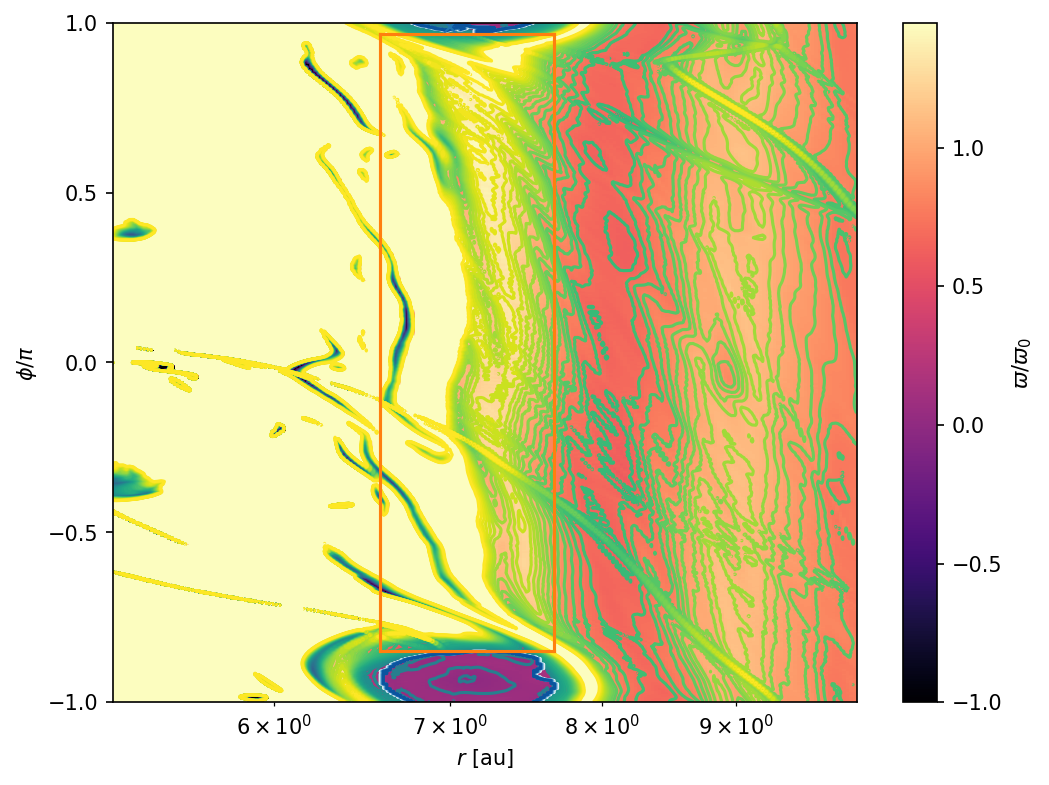

In [31]:
fig, ax = plt.subplots(figsize=(8,6),dpi=150)
ax.set_xscale("log")

Z = vortensity
cmap = "magma"
norm = colors.Normalize(vmin=levels[0], vmax=levels[-1])
img = ax.pcolormesh(Xc_view, Yc_view/np.pi, vortensity_view,cmap=cmap,norm=norm, rasterized=True)

candidates_list = [c for c in candidates.values()]
candidates_bak_list = [c for c in candidates_bak.values()]

# for contour in candidates_bak_list:
#     ax.contour(Xc[vmi:vma,:], Yc[vmi:vma,:], contour["mask"])

ax.contour(Xc_view, Yc_view/np.pi, vortensity_view, levels=levels)

for n, contour in enumerate(candidates_list):
    cmap = "Blues" if n==1 else "Greys"
    ax.contour(Xc_view, Yc_view/np.pi, contour["mask"], cmap="Blues")
    x,y = contour["vortensity_min_pos"]
    ax.plot([x], [y/np.pi], "x")
    rmin = contour["rmin"]
    rmax = contour["rmax"]
    phimin = contour["phimin"]/np.pi
    phimax = contour["phimax"]/np.pi
    ax.plot([rmin, rmin], [phimin, phimax], color="C1")
    ax.plot([rmax, rmax], [phimin, phimax], color="C1")
    ax.plot([rmin, rmax], [phimin, phimin], color="C1")
    ax.plot([rmin, rmax], [phimax, phimax], color="C1")

    

ax.set_xlabel(r"$r$ [au]")
ax.set_ylabel(r"$\phi / \pi$")
ax.set_yticks([-1, -0.5, 0, 0.5, 1])

cbar = fig.colorbar(img, ax=ax)
cbar.set_label(r"$\varpi/\varpi_0$")

## Print out some properties

In [32]:
from pprint import pprint
for vort in candidates.values():
    try:
        v = vort.copy()
        for k in ["cnt", "mask", "mask_extended","gmask"]:
            del v[k]
        pprint(v)
        mass = vort["mass"]
        vort_med = vort["vortensity_median"]
        print([x % Nh for x in vort["bounding_vert"]])
        print("strength", np.exp(-vort_med)*mass)
    except KeyError:
        pass
    print()

## Calculate the center of gravity of the vortex

In [33]:
from scipy.optimize import curve_fit

def gauss(x, y0, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2)) + y0

class Fitter:
    def __init__(self, x, y, weights=None, autoweight=True, blow=dict(), bup=dict(), fixed=dict()):
        self.x = x
        self.y = y
        self.autoweight = autoweight
        self.weights = weights
        
        self.parameters = ["y0", "a", "x0", "sigma"]
        
        self.blow = {key : -np.inf for key in self.parameters}
        self.bup = {key : np.inf for key in self.parameters}
        self.blow["sigma"] = 0
        self.bup["sigma"] = (np.max(x)-np.min(x))
        self.blow["x0"] = np.min(x)
        self.bup["x0"] = np.max(x)
        
        for key, val in blow.items():
            self.set_lower_bound(key, val)
        for key, val in bup.items():
            self.set_upper_bound(key, val)
        
        self.fixed = fixed
    
    def set_lower_bound(self, key, value):
        if not key in self.parameters:
            raise KeyError(f"{key} is not a member of the lower bounds dict.")
        self.blow[key] = value
        
    def set_upper_bound(self, key, value):
        if not key in self.parameters:
            raise KeyError(f"{key} is not a member of the upper bounds dict.")
        self.bup[key] = value
        
    def set_fixed(self, key, value):
        if not key in self.parameters:
            raise KeyError(f"{key} is not a valid parameter.")
        self.fixed[key] = value
    
    def fit(self):
        popt, pcov = self.fit_single()
        
        if self.weights is None and self.autoweight:
            peak_value = popt[0] + popt[1] # y0 + a
            self.calc_weights(peak_value)
            popt, pcov = self.fit_single()
        return popt, pcov
    
    def calc_weights(self, peak_value):
        difference = np.abs(self.y - peak_value)
        self.weights = np.exp(-difference/np.max(difference))
    
    def fit_single(self):
        x = self.x
        y = self.y
        fixed = self.fixed
        weights = self.weights
        lower = [self.blow[key] for key in self.parameters]
        upper = [self.bup[key] for key in self.parameters]
        
        mean = sum(x * y) / sum(y)
        sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))
        
        if "y0" in fixed and "a" in fixed:
            f = lambda x,x0,sig: gauss(x, fixed["y0"], fixed["a"], x0, sig)
            p0 = [mean, sigma]
            bounds = (lower[2:], upper[2:])
            popt,pcov = curve_fit(f, x, y, p0=p0, bounds=bounds, sigma=weights)
            popt = [fixed["y0"], fixed["a"], popt[0], popt[1]]
        elif "y0" in fixed:
            f = lambda x,a,x0,sig: gauss(x, fixed["y0"], a, x0, sig)
            p0 = [np.average(y),mean, sigma]
            bounds = (lower[1:], upper[1:])
            popt,pcov = curve_fit(f, x, y, p0=p0,bounds=bounds, sigma=weights)
            popt = [fixed["y0"], popt[0], popt[1], popt[2]]
        else:
            f = gauss
            p0 = [np.average(y), y[int(len(y)/2)], mean, sigma]
            bounds = (lower, upper)
            popt,pcov = curve_fit(f, x, y, p0=p0, bounds=bounds, sigma=weights)
    
        return popt, pcov

In [34]:
def combine_periodic(x,y,m,lb=-np.pi,rb=np.pi):
    """ Combine an array split at a periodic boundary. """
    if m[0] and m[-1] and not all(m):
        bnd = np.where(m==False)[0][0]
        xl = x[:bnd]
        yl = y[:bnd]
        bnd = np.where(m==False)[0][-1]
        xr = x[bnd:]
        yr = y[bnd:]
        xcom = np.append(xr, xl+(rb-lb))
        ycom = np.append(yr, yl)
        return xcom, ycom
    else:
        return x[m],y[m]

In [35]:
def plot_periodic_mask(ax, x, y, m, **kwargs):
#     print(m)
    if m[0] and m[-1] and not all(m):
        bnd = np.where(m==False)[0][0]
        xl = x[:bnd]
        yl = y[:bnd]
        line, = ax.plot(xl, yl, **kwargs)
        bnd = np.where(m==False)[0][-1]
#         print(len(x))
#         print(bnd)
        xr = x[bnd:]
        yr = y[bnd:]
        kwa = kwargs.copy()
        kwa["color"] = line.get_color()
        kwa["ls"] = line.get_linestyle()
        line, = ax.plot(xr, yr, **kwa)
        line.set_label(None)
    else:
        ax.plot(x[m],y[m],**kwargs)

def plot_periodic(ax, x, y, m=None, boundaries=(-np.pi, np.pi), **kwargs):
    if m is not None:
        plot_periodic_mask(ax, x, y, m, **kwargs)
        return
    x[x<boundaries[0]] += boundaries[1]-boundaries[0]
    m = x > boundaries[1]
    if not any(m):
        ax.plot(x,y,**kwargs)
    else:
        bnd = np.where(m==True)[0][0]
        xl = x[:bnd]
        yl = y[:bnd]
        line, = ax.plot(xl, yl, **kwargs)
        xr = x[bnd:] - (boundaries[1]-boundaries[0])
        yr = y[bnd:]
        kwa = kwargs.copy()
        kwa["color"] = line.get_color()
        kwa["ls"] = line.get_linestyle()
        line, = ax.plot(xr, yr, **kwa)
        line.set_label(None)
    


In [36]:
def plot_gauss(ax,x,y, xfull=None, double_fit=True, fixed=dict(), blow=dict(), bup=dict()):
    try:
        fitter = Fitter(x, y, blow=blow, bup=bup, fixed=fixed)
        popt, pcov = fitter.fit_single()
        ax.plot(x, gauss(x, *popt), 'r-', color="C2", label='1st fit')
        
        if double_fit:
            peak_value = popt[0] + popt[1] # y0 + a
            difference = np.abs(y - peak_value)
            w = np.exp(-difference/np.max(difference))
            fitter.weights = w
            popt,pcov = fitter.fit_single()
            
            popt, pcov = fitter.fit_single()
            ax.plot(x, 0.5*w/np.max(w)*(popt[0]+popt[1]), color="C2", ls=":", label="weights")
            ax.plot(x, gauss(x, *popt), ls='--', color="C3", lw=2, label='2nd fit')
        
        if xfull is not None:
            ax.plot(xfull, gauss(xfull, *popt), 'r-', alpha=0.2)
        return popt, pcov
    except RuntimeError:
        pass
    
def plot_gauss_periodic(ax, x, y, m=None, double_fit=True, fixed=dict(), blow=dict(), bup=dict()):
    if m is None:
        m = np.ones(len(x), dtype=bool)
    try:
        xc, yc = combine_periodic(x,y,m)
        
        fitter = Fitter(xc, yc, blow=blow, bup=bup, fixed=fixed)
        popt, pcov = fitter.fit_single()

        plot_periodic(ax, xc, gauss(xc, *popt), ls="-", color="C2", label='1st fit')
        
        if double_fit:
            peak_value = popt[0] + popt[1] # y0 + a
            difference = np.abs(yc - peak_value)
            w = np.exp(-difference/np.max(difference))
            fitter.weights = w
            popt,pcov = fitter.fit_single()
            
            plot_periodic(ax, xc, np.min(y) +  0.5*w/np.max(w)*(np.max(y)-np.min(y)), color="C2", ls=":", label="weights")
            plot_periodic(ax, xc, gauss(xc, *popt), ls="--", lw=2, color="C3", label='2nd fit')
        
        c = popt[2]
        xnew = np.linspace(c-np.pi, c+np.pi, 500, endpoint=False)
        plot_periodic(ax, xnew, gauss(xnew, *popt), ls="-", color="C3", alpha=0.2)
        return popt, pcov
    except RuntimeError:
        pass

In [37]:
def extend_vortex_mask_by_size(mask, fraction=0.25):
    L = np.sum(mask)
    dL = int(fraction*L)

    m = mask[1:] != mask[:-1]
    copy = mask.copy()
    bnd = np.where(m)[0][0]
    
    if mask[bnd+1]:
        copy[bnd-dL:bnd+1] = True
        bnd = np.where(m)[0][-1]
        copy[bnd:bnd+dL] = True
    else:
        copy[bnd:bnd+dL] = True
        bnd = np.where(m)[0][-1]
        copy[bnd-dL:bnd+1] = True
    return copy

In [38]:
def extend_vortex_mask_by_value(mask, y, ref):

    m = mask[1:] != mask[:-1]
    copy = mask.copy()
    bnd = np.where(m)[0][0]
    go_left = mask[bnd+1]
    if go_left:
        r = range(bnd, -1, -1)
    else:
        r = range(bnd, len(mask))
    last = y[bnd]
    for n in r:
        crossing_ref_up = y[n] >= ref and last < ref
        crossing_ref_down = y[n] <= ref and last > ref
        if crossing_ref_up or crossing_ref_down:
            break
        else:
            copy[n] = True
            last = y[n]
            
    bnd = np.where(m)[0][-1]
    go_left = mask[bnd+1]
    if go_left:
        r = range(bnd, -1, -1)
    else:
        r = range(bnd, len(mask))
    last = y[bnd]
    for n in r:
        crossing_ref_up = y[n] >= ref and last < ref
        crossing_ref_down = y[n] <= ref and last > ref
        if crossing_ref_up or crossing_ref_down:
            break
        else:
            copy[n] = True
            last = y[n]
    
    return copy
    

## Vortensity slices onto the vortex

avg 1.442096596657037
c -2.94922527595111


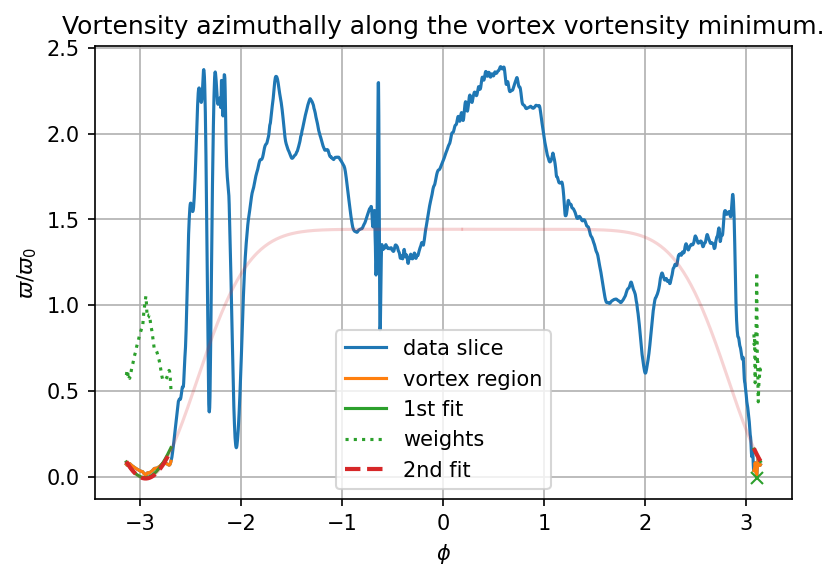

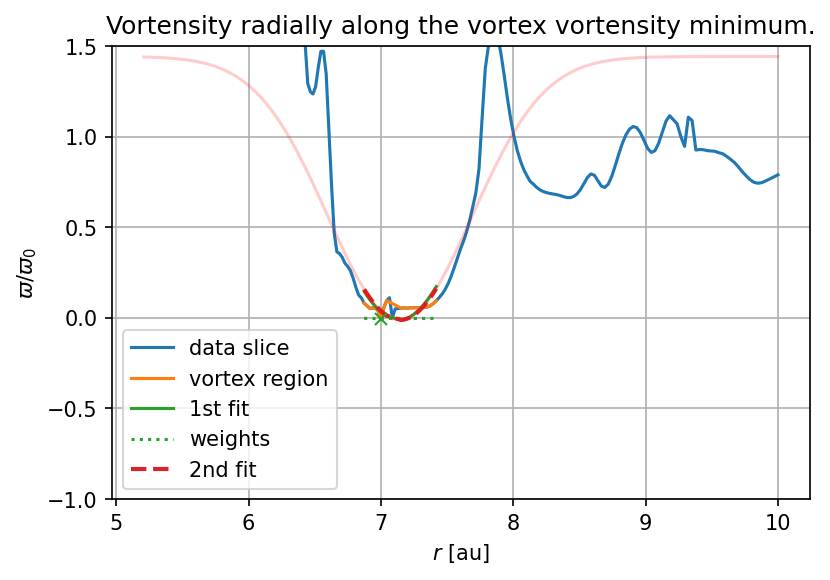

In [39]:
for vort in candidates.values():
    if "fit_sigma_center_r_ind" in vort:
        inds = (vort["fit_sigma_center_r_ind"], vort["fit_sigma_center_phi_ind"])
        mask_r = vort["fit_sigma_mask_r"]
        mask_phi = vort["fit_sigma_mask_phi"]

    else:
        inds = vort["vortensity_min_inds"]

        mask = vort["mask"]
        mask_r = mask[:, inds[1]]
        mask_phi = mask[inds[0], :]
    
    vortensity_r = vortensity_view[:, inds[1]]
    vortensity_phi = vortensity_view[inds[0], :]
    
    phi = Yc_view[inds[0],:]
    r = Xc_view[:,inds[1]]
    
#     mask_phi = extend_vortex_mask_by_size(mask_phi)
#     mask_r = extend_vortex_mask_by_size(mask_r)
    
    ref = np.average(vortensity_phi)
#     mask_phi = extend_vortex_mask_by_value(mask_phi, vortensity_phi, ref)
#     mask_r = extend_vortex_mask_by_value(mask_r, vortensity_r, ref)
    

    fig, ax = plt.subplots(dpi=150)
    ax.plot(phi, vortensity_phi, label="data slice")
    plot_periodic(ax,phi, vortensity_phi, m=mask_phi, label="vortex region")
    avg = np.average(vortensity_phi)
    print("avg", avg)
    popt, pcov = plot_gauss_periodic(ax,phi, vortensity_phi, m=mask_phi, fixed={"y0" : avg})
#     popt, pcov = plot_gauss_periodic(ax,Yc_view[inds[0],:], vortensity_phi, m=mask_phi, fixed={"y0" : 1})
#     popt, pcov = plot_gauss_periodic(ax,Yc_view[inds[0],:], vortensity_phi, m=mask_phi, blow={"y0" : avg/10}, bup={"y0": avg*2})
    ax.plot([Yc_view[inds]],[vortensity_view[inds]], "x")
    ax.set_xlabel(r"$\phi$")
    ax.set_ylabel(r"$\varpi/\varpi_0$")
    ax.set_title("Vortensity azimuthally along the vortex vortensity minimum.")
    ax.legend()
    ax.grid()
#     ax.plot(Yc_view[inds[0],:], mask_phi_copy)

    c = popt[2]
    c = (c+np.pi)%(2*np.pi)-np.pi
    print("c", c)
    sig = popt[3]
    cind = np.argmin(np.abs(phi - c))
    lphi = ((c-sig)+np.pi) % (2*np.pi) - np.pi
    lind = np.argmin(np.abs(phi - lphi))
    uphi = ((c+sig)+np.pi) % (2*np.pi) - np.pi
    uind = np.argmin(np.abs(phi - uphi))
    mask = np.zeros(len(phi), dtype=bool)
    if c + sig > np.pi or c - sig < -np.pi:
        mask[lind:] = True
        mask[:uind+1] = True
    else:
        mask[lind:uind+1] = True
    vort["fit_vortensity_center_phi"] = c
    vort["fit_vortensity_center_phi_ind"] = cind
    vort["fit_vortensity_sigma_phi"] = sig
    vort["fit_vortensity_mask_phi"] = mask
    
    fig, ax = plt.subplots(dpi=150)
    ax.plot(r, vortensity_r, label="data slice")
    ax.plot(r[mask_r], vortensity_r[mask_r], label="vortex region")
    popt, pcov = plot_gauss(ax,r[mask_r], vortensity_r[mask_r], xfull=Xc_view[:,inds[1]], fixed = {"y0" : popt[0], "a" : popt[1]})
    ax.plot([Xc_view[inds]],[vortensity_view[inds]], "x")
    ax.set_xlabel(r"$r$ [au]")
    ax.set_ylabel(r"$\varpi/\varpi_0$")
    ax.set_title("Vortensity radially along the vortex vortensity minimum.")
    ax.set_ylim([-1,1.5])
    ax.legend()
    ax.grid()
#     ax.plot(Xc_view[:,inds[1]], mask_r)
#     ax.plot(Xc_view[:,inds[1]], mask_r_copy)

    c = popt[2]
    sig = popt[3]
    cind = np.argmin(np.abs(r - c))
    lr = c - sig
    lind = np.argmin(np.abs(r - lr))
    ur = c + sig
    uind = np.argmin(np.abs(r - ur))
    mask = np.zeros(len(r), dtype=bool)
    mask[lind:uind+1] = True
    vort["fit_vortensity_center_r"] = c
    vort["fit_vortensity_center_r_ind"] = cind
    vort["fit_vortensity_sigma_r"] = sig
    vort["fit_vortensity_mask_r"] = mask

    

    break

## Fitting gaussian to sigma with vortensity fit mask

c -2.922241836913832
sigma r popt [1.5788838824152928e-05, 3.656518555939483e-05, 7.169955132427812, 0.3748839386770118]
sigma center 7.169955132427812


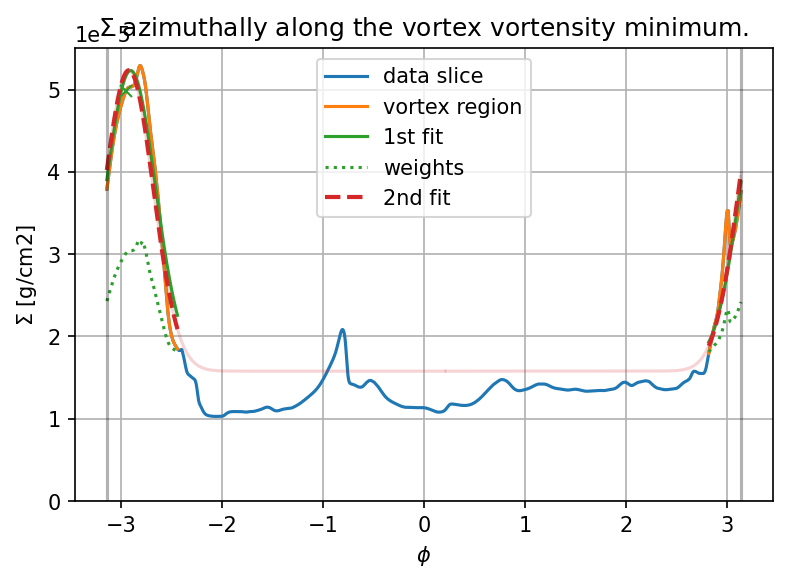

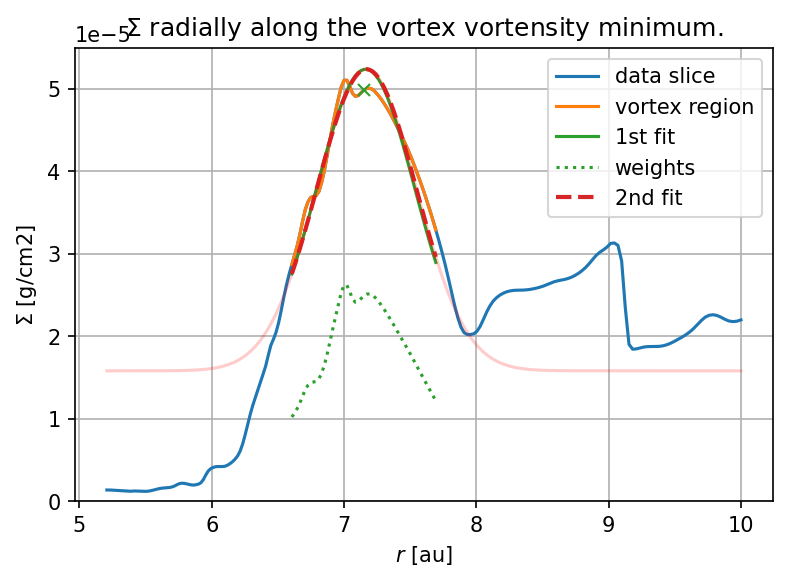

In [40]:
for vort in candidates.values():
    inds = (vort["fit_vortensity_center_r_ind"], vort["fit_vortensity_center_phi_ind"])

    mask_r = vort["fit_vortensity_mask_r"]
    mask_phi = vort["fit_vortensity_mask_phi"]
    
    sigma_r = Rho_view[:, inds[1]]
    sigma_phi = Rho_view[inds[0], :]
    

    r = Xc_view[:,inds[1]]
    phi = Yc_view[inds[0],:]
    
    fig, ax = plt.subplots(dpi=150)
    ax.plot(phi, sigma_phi, label="data slice")
    plot_periodic(ax, phi, sigma_phi, m=mask_phi, label="vortex region")
    popt, _ = plot_gauss_periodic(ax,Yc_view[inds[0],:], sigma_phi, m=mask_phi, 
                                  blow = {"y0" : 0, "a" : 0})
#                                   fixed={"y0" : 0})
    ax.plot([Yc_view[inds]],[Rho_view[inds]], "x")
    ax.axvline(np.pi, color="k", alpha=0.3)
    ax.axvline(-np.pi, color="k", alpha=0.3)
    ax.set_xlabel(r"$\phi$")
    ax.set_ylabel(r"$\Sigma$ [g/cm2]")
    ax.set_title(r"$\Sigma$ azimuthally along the vortex vortensity minimum.")
    ax.set_ylim(bottom=0)
    ax.legend()
    ax.grid()
    
    c = popt[2]
    c = (c+np.pi)%(2*np.pi)-np.pi
    print("c", c)
    sig = popt[3]
    cind = np.argmin(np.abs(phi - c))
    lphi = ((c-sig)+np.pi) % (2*np.pi) - np.pi
    lind = np.argmin(np.abs(phi - lphi))
    uphi = ((c+sig)+np.pi) % (2*np.pi) - np.pi
    uind = np.argmin(np.abs(phi - uphi))
    mask = np.zeros(len(phi), dtype=bool)
    if c + sig > np.pi or c - sig < -np.pi:
        mask[lind:] = True
        mask[:uind+1] = True
    else:
        mask[lind:uind+1] = True
    vort["fit_sigma_center_phi"] = c
    vort["fit_sigma_center_phi_ind"] = cind
    vort["fit_sigma_sigma_phi"] = sig
    vort["fit_sigma_mask_phi"] = mask
    
    fig, ax = plt.subplots(dpi=150)
    ax.plot(r, sigma_r, label="data slice")
    ax.plot(r[mask_r], sigma_r[mask_r], label="vortex region")
    
    popt, pcov, = plot_gauss(ax,r[mask_r], sigma_r[mask_r], xfull=Xc_view[:,inds[1]], 
#                              blow = {"y0" : 0, "a" : 0})
                             fixed = {"y0" : popt[0], "a" : popt[1]})
    ax.plot([Xc_view[inds]],[Rho_view[inds]], "x")
    ax.set_xlabel(r"$r$ [au]")
    ax.set_ylabel(r"$\Sigma$ [g/cm2]")
    ax.set_title(r"$\Sigma$ radially along the vortex vortensity minimum.")
    ax.set_ylim(bottom=0)
    ax.legend()
    ax.grid()
    
    print("sigma r popt", popt)
    c = popt[2]
    sig = popt[3]
    cind = np.argmin(np.abs(r - c))
    lr = c - sig
    lind = np.argmin(np.abs(r - lr))
    ur = c + sig
    uind = np.argmin(np.abs(r - ur))
    mask = np.zeros(len(r), dtype=bool)
    mask[lind:uind+1] = True
    print("sigma center", c)
    vort["fit_sigma_center_r"] = c
    vort["fit_sigma_center_r_ind"] = cind
    vort["fit_sigma_sigma_r"] = sig
    vort["fit_sigma_mask_r"] = mask

    break

## Fitting gaussian to sigma with contour mask

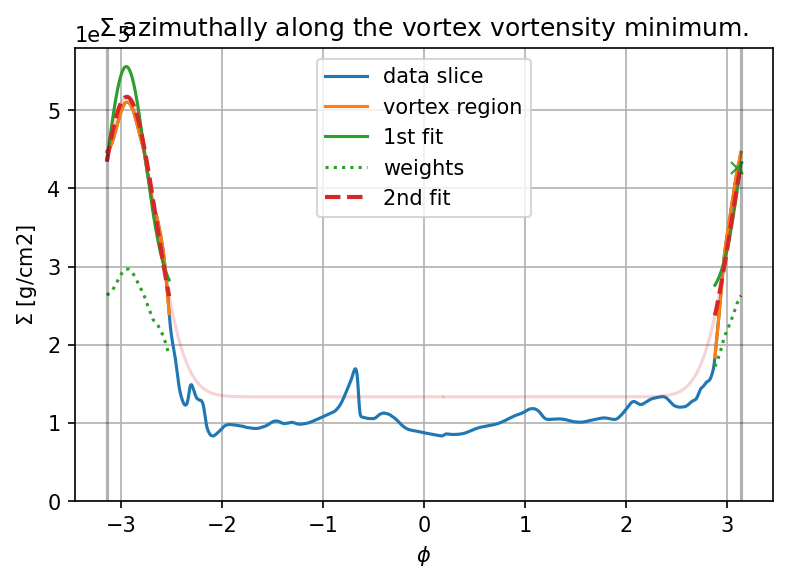

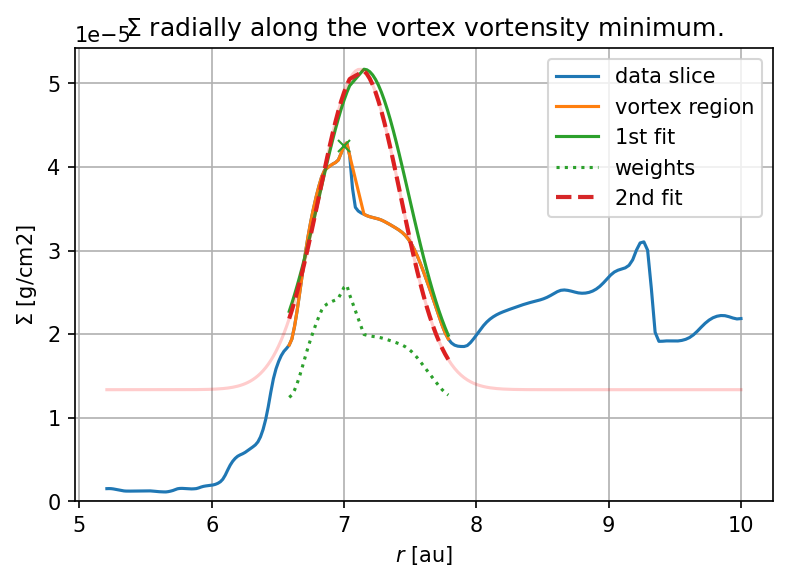

In [41]:
for vort in candidates.values():

    inds = vort["vortensity_min_inds"]
    
    mask = vort["mask"]
    mask_r = mask[:, inds[1]]
    mask_phi = mask[inds[0], :]
    
    sigma_r = Rho_view[:, inds[1]]
    sigma_phi = Rho_view[inds[0], :]
    
    vortensity_r = vortensity_view[:, inds[1]]
    vortensity_phi = vortensity_view[inds[0], :]
    
    
    ref = np.average(vortensity_phi)
    mask_phi = extend_vortex_mask_by_value(mask_phi, vortensity_phi, ref)
    mask_r = extend_vortex_mask_by_value(mask_r, vortensity_r, ref)

    fig, ax = plt.subplots(dpi=150)
    ax.plot(Yc_view[inds[0],:], sigma_phi, label="data slice")
    plot_periodic(ax, Yc_view[inds[0],:], sigma_phi, m=mask_phi, label="vortex region")
    popt, _ = plot_gauss_periodic(ax,Yc_view[inds[0],:], sigma_phi, m=mask_phi, 
                                  blow = {"y0" : 0, "a" : 0})
#                                   fixed={"y0" : 0})
#     xcom, ycom = combine_periodic(Yc_view[inds[0],:], sigma_phi, mask_phi)
#     ax.plot(xcom, ycom)
    ax.plot([Yc_view[inds]],[Rho_view[inds]], "x")
    ax.axvline(np.pi, color="k", alpha=0.3)
    ax.axvline(-np.pi, color="k", alpha=0.3)
    ax.set_xlabel(r"$\phi$")
    ax.set_ylabel(r"$\Sigma$ [g/cm2]")
    ax.set_title(r"$\Sigma$ azimuthally along the vortex vortensity minimum.")
    ax.set_ylim(bottom=0)
    ax.legend()
    ax.grid()
    
    fig, ax = plt.subplots(dpi=150)
    ax.plot(Xc_view[:,inds[1]], sigma_r, label="data slice")
    ax.plot(Xc_view[:,inds[1]][mask_r], sigma_r[mask_r], label="vortex region")
    plot_gauss(ax,Xc_view[:,inds[1]][mask_r], sigma_r[mask_r], xfull=Xc_view[:,inds[1]], fixed = {"y0" : popt[0], "a" : popt[1]})
    ax.plot([Xc_view[inds]],[Rho_view[inds]], "x")
    ax.set_xlabel(r"$r$ [au]")
    ax.set_ylabel(r"$\Sigma$ [g/cm2]")
    ax.set_title(r"$\Sigma$ radially along the vortex vortensity minimum.")
    ax.set_ylim(bottom=0)
    ax.legend()
    ax.grid()

    break

## Vorticity slices at the location of the vortex

mass_enhancement 6.518534424087072e-05
mass_background 6.908030014470418e-05
mass 0.0001342656443855749
vortensity_min -0.0066713865398692245
vortensity_median 0.06261849078643167
vortensity_mean 0.058545635289258
vortensity_max 0.1301293179475789
strength 0.13211472610128705


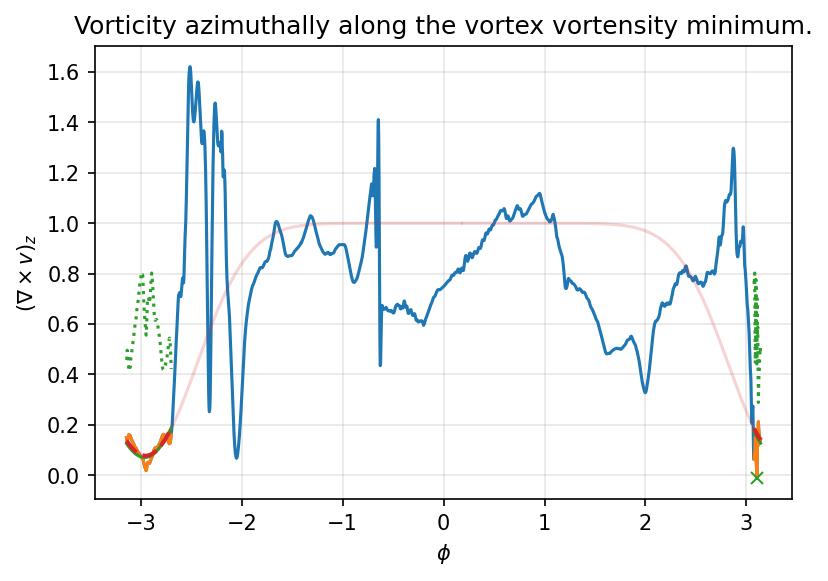

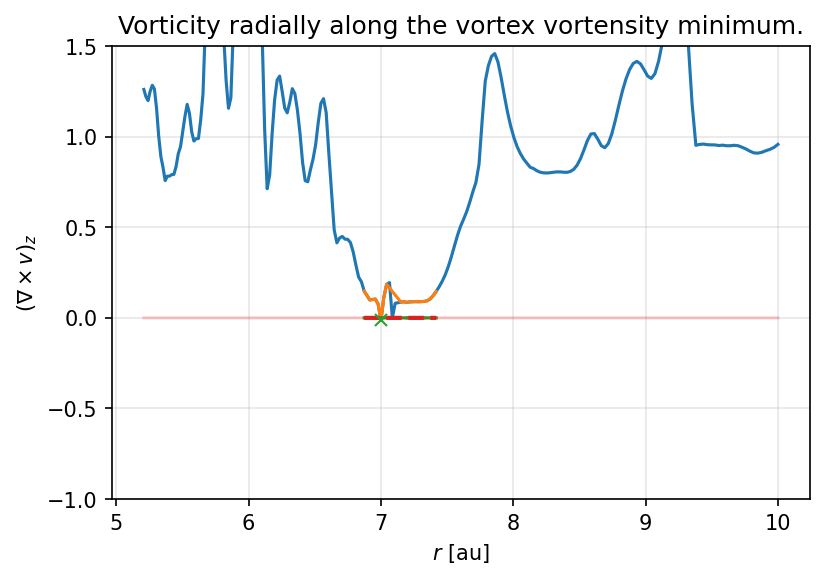

In [42]:
for vort in candidates.values():
    for v in ["mass_enhancement", "mass_background", "mass", "vortensity_min", "vortensity_median", "vortensity_mean", "vortensity_max"]:
        print(v, vort[v])
    mass = vort["mass"]/(1*u.jupiterMass).to_value("solMass")
    vort_med = vort["vortensity_median"]
    print("strength", np.exp(-vort_med)*mass)
    
    inds = vort["vortensity_min_inds"]
    
    mask = vort["mask"]
    mask_r = mask[:, inds[1]]
    mask_phi = mask[inds[0], :]
    
    vorticity_r = vorticity_view[:, inds[1]]
    vorticity_phi = vorticity_view[inds[0], :]
    
    fig, ax = plt.subplots(dpi=150)
    ax.plot(Yc_view[inds[0],:], vorticity_phi)
    plot_periodic(ax, Yc_view[inds[0],:], vorticity_phi, m=mask_phi)
    plot_gauss_periodic(ax,Yc_view[inds[0],:], vorticity_phi, m=mask_phi, fixed={"y0" : 1})
    ax.plot([Yc_view[inds]],[vorticity_view[inds]], "x")
    ax.set_xlabel(r"$\phi$")
    ax.set_ylabel(r"$(\nabla \times v)_z$")
    ax.set_title("Vorticity azimuthally along the vortex vortensity minimum.")
    ax.grid(alpha=0.3)

    fig, ax = plt.subplots(dpi=150)
    ax.plot(Xc_view[:,inds[1]], vorticity_r)
    ax.plot(Xc_view[:,inds[1]][mask_r], vorticity_r[mask_r])
    plot_gauss(ax,Xc_view[:,inds[1]][mask_r], vorticity_r[mask_r], xfull=Xc_view[:,inds[1]], fixed = {"y0" : popt[0], "a" : popt[1]})
    ax.plot([Xc_view[inds]],[vorticity_view[inds]], "x")
    ax.set_xlabel(r"$r$ [au]")
    ax.set_ylabel(r"$(\nabla \times v)_z$")
    ax.set_title("Vorticity radially along the vortex vortensity minimum.")
    ax.set_ylim([-1,1.5])
    ax.grid(alpha=0.3)
    

    break

## Extend mask to full data array size

In [43]:
for c in candidates.values():
    mask = c["mask"]
    gmask = np.concatenate(
        [np.zeros((vmi, mask.shape[1]),dtype=bool), 
        mask,
        np.zeros((Xc.shape[0]-vma, mask.shape[1]),dtype=bool)],
        axis=0)
    c["gmask"] = gmask
    c["gtop"] = (c["top"][0] + vmi, c["top"][1])
    c["gright"] = (c["right"][0] + vmi, c["right"][1])
    c["gleft"] = (c["left"][0] + vmi, c["left"][1])
    c["gbottom"] = (c["bottom"][0] + vmi, c["bottom"][1])

In [44]:
from scipy.optimize import curve_fit

def gauss2D(v, c, a, x0, y0, wx, wy):
    x, y = v
    ex = np.exp(-(x - x0)**2 / (2 * wx**2))
    ey = np.exp(-(y - y0)**2 / (2 * wy**2))
    return c + a*ex*ey

class Gauss2DFitter:
    def __init__(self, x, y, z, weights=None, autoweight=False, blow=None, bup=None, fixed=None, p0=None):
        blow = {} if blow is None else blow
        bup = {} if bup is None else bup
        fixed = {} if fixed is None else fixed
        p0 = {} if p0 is None else p0
        
        self.x = x
        self.y = y
        self.z = z
        self.autoweight = autoweight
        self.weights = weights
        
        self.parameters = ["c", "a", "x0", "y0", "wx", "wy"]
        
        self.blow = {key : -np.inf for key in self.parameters}
        self.bup = {key : np.inf for key in self.parameters}
        self.blow["wx"] = 0
        self.bup["wx"] = np.max(x)-np.min(x)
        self.blow["x0"] = np.min(x)
        self.bup["x0"] = np.max(x)
        
        self.blow["wy"] = 0
        self.bup["wy"] = min((np.max(y)-np.min(y)), np.pi)
        self.blow["y0"] = np.min(y)
        self.bup["y0"] = np.max(y)
        
        for key, val in blow.items():
            self.set_lower_bound(key, val)
        for key, val in bup.items():
            self.set_upper_bound(key, val)
        
        self.fixed = fixed
        self.p0 = p0

    def set_lower_bound(self, key, value):
        if not key in self.parameters:
            raise KeyError(f"{key} is not a member of the lower bounds dict.")
        self.blow[key] = value
        
    def set_upper_bound(self, key, value):
        if not key in self.parameters:
            raise KeyError(f"{key} is not a member of the upper bounds dict.")
        self.bup[key] = value
        
    def set_fixed(self, key, value):
        if not key in self.parameters:
            raise KeyError(f"{key} is not a valid parameter.")
        self.fixed[key] = value
    
    def fit(self):
        popt, pcov = self.fit_single()
        
        if self.weights is None and self.autoweight:
            peak_value = popt[0] + popt[1] # y0 + a
            self.calc_weights(peak_value)
            popt, pcov = self.fit_single()
        return popt, pcov
    
    def calc_weights(self, peak_value):
        difference = np.abs(self.y - peak_value)
        self.weights = np.exp(-difference/np.max(difference))
    
    def fit_single(self):
        x = self.x
        y = self.y
        z = self.z
        fixed = self.fixed
        weights = self.weights
        lower = [self.blow[key] for key in self.parameters]
        upper = [self.bup[key] for key in self.parameters]
        
        x0_guess = 0.5*(np.max(x) + np.min(x))
        wx_guess = 0.5*(np.max(x) - np.min(x))
        
        y0_guess = 0.5*(np.max(y) + np.min(y))
        wy_guess = 0.5*(np.max(y) - np.min(y))
        
#         if "y0" in fixed and "a" in fixed:
#             f = lambda x,x0,sig: gauss(x, fixed["y0"], fixed["a"], x0, sig)
#             p0 = [mean, sigma]
#             bounds = (lower[2:], upper[2:])
#             popt,pcov = curve_fit(f, x, y, p0=p0, bounds=bounds, sigma=weights)
#             popt = [fixed["y0"], fixed["a"], popt[0], popt[1]]
#         elif "y0" in fixed:
#             f = lambda x,a,x0,sig: gauss(x, fixed["y0"], a, x0, sig)
#             p0 = [np.average(y),mean, sigma]
#             bounds = (lower[1:], upper[1:])
#             popt,pcov = curve_fit(f, x, y, p0=p0,bounds=bounds, sigma=weights)
#             popt = [fixed["y0"], popt[0], popt[1], popt[2]]
#         else:
        f = gauss2D
        zavg = np.average(z)
        c_guess = zavg
        a_guess = zavg
        p0 = {
            "c" : c_guess,
            "a" : a_guess, 
            "x0" : x0_guess, 
            "y0" : y0_guess, 
            "wx" : wx_guess, 
            "wy" : wy_guess
        }
        for key, val in self.p0.items():
            p0[key] = val
        self.p0 = p0
        p0_vec = [p0[key] for key in self.parameters]
        bounds = (lower, upper)
        popt,pcov = curve_fit(f, (x, y), z, p0=p0_vec, bounds=bounds, sigma=weights)
    
        return popt, pcov

Sigma fit parameters
c      1.13e-05 ( 9.87e-06) [ 9.25e-06,  1.54e-05]
a      3.99e-05 ( 4.10e-05) [ 3.08e-05,  5.13e-05]
x0     7.18e+00 ( 7.00e+00) [ 6.61e+00,  7.67e+00]
y0     3.36e+00 ( 3.10e+00) [ 3.04e+00,  3.61e+00]
wx     4.37e-01 ( 5.32e-01) [ 0.00e+00,  1.06e+00]
wy     2.97e-01 ( 2.84e-01) [ 0.00e+00,  5.68e-01]


<ipython-input-45-5c922adf7f42>:84: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = ax.pcolormesh(Xc_view, Yc_view, Rho_view)


Vortensity fit parameters
c      1.17e+00
a     -1.18e+00
x0     7.12e+00
y0     3.34e+00
wx     1.06e+00
wy     5.68e-01


<ipython-input-45-5c922adf7f42>:132: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = ax.pcolormesh(Xc_view, Yc_view, vortensity_view, vmin=levels[0], vmax=levels[-1], cmap="magma")


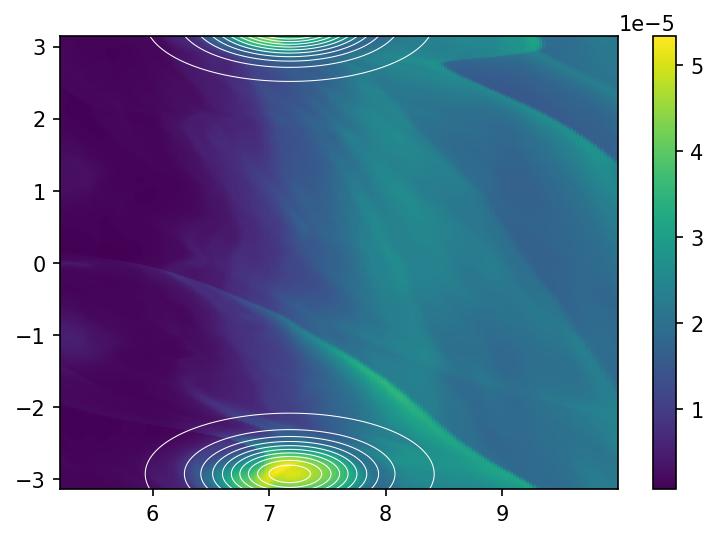

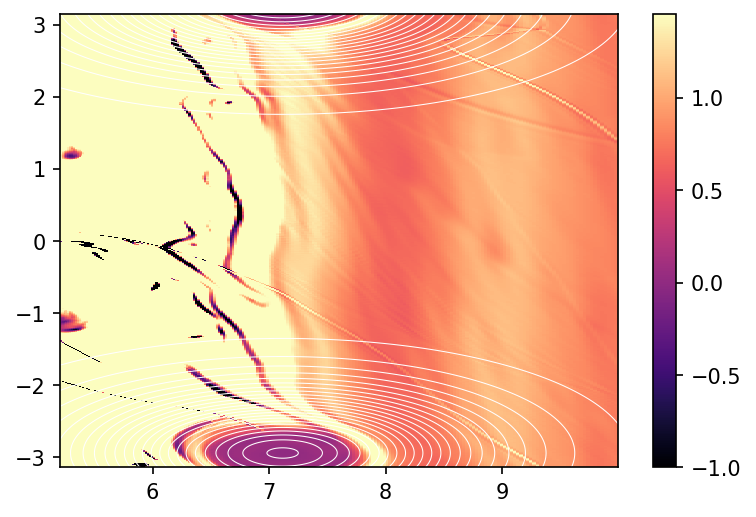

In [45]:
vort = [c for c in candidates.values()][0]
inds = vort["vortensity_min_inds"]

def get_pos(inds):
    r = Xc_view[inds]
    phi = Yc_view[inds]
    return (r,phi)

top = get_pos(vort["top_view"])
left = get_pos(vort["left_view"])
right = get_pos(vort["right_view"])
bottom = get_pos(vort["bottom_view"])


mask = vort["mask"]
mask_r = mask[:, inds[1]]
mask_phi = mask[inds[0],:]

vals = Rho_view
R = Xc_view[mask]
PHI = Yc_view[mask]

Z = vals[mask]
Z_r = vals[:, inds[1]]
Z_phi = vals[inds[0],:]

r0 = Xc_view[inds]
phi0 = Yc_view[inds]


c_ref = np.average(Z_phi[np.logical_not(mask_phi)])

c_guess = c_ref
a_guess = np.max(Z) - c_guess


if bottom[1] > top[1]:
    if phi0 > 0:
        mask_up = PHI < phi0-np.pi
        mask_low = np.logical_not(mask_up)

        R_up = R[mask_up]
        PHI_up = PHI[mask_up]+2*np.pi
        Z_up = Z[mask_up]

        R_low = R[mask_low]
        PHI_low = PHI[mask_low]
        Z_low = Z[mask_low]

        R_fit = np.append(R_low,R_up)
        PHI_fit = np.append(PHI_low,PHI_up)
        Z_fit = np.append(Z_low,Z_up)
    else:
        mask_up = PHI > phi0+np.pi
        mask_low = np.logical_not(mask_up)

        R_up = R[mask_up]
        PHI_up = PHI[mask_up]-2*np.pi
        Z_up = Z[mask_up]

        R_low = R[mask_low]
        PHI_low = PHI[mask_low]
        Z_low = Z[mask_low]

        R_fit = np.append(R_low,R_up)
        PHI_fit = np.append(PHI_low,PHI_up)
        Z_fit = np.append(Z_low,Z_up)
else:
    R_fit = R
    PHI_fit = PHI
    Z_fit = Z

fitter = Gauss2DFitter(R_fit, PHI_fit, Z_fit, 
                       p0={"x0" : r0, "y0" : phi0, "c" : 0.8*c_ref, "a" : a_guess},
                       blow={"c" : 0.75*c_ref, "a": 0.75*a_guess},
                       bup={"c" : 1.25*c_ref, "a": 1.25*a_guess})
popt_rho, _ = fitter.fit_single()

print("Sigma fit parameters")
for name, val, guess, low, up in zip(fitter.parameters, popt_rho, fitter.p0.values(), fitter.blow.values(), fitter.bup.values()):
    print(f"{name:5s} {val: .2e} ({guess: .2e}) [{low: .2e}, {up: .2e}]")

fig, ax = plt.subplots(dpi=150)
img = ax.pcolormesh(Xc_view, Yc_view, Rho_view)
ax.contour(Xc_view, Yc_view, gauss2D((Xc_view, Yc_view), *popt_rho), 10, colors="w", linewidths=0.5)
if phi0 < 0:
    popt = popt_rho.copy()
    popt[3] += 2*np.pi
    ax.contour(Xc_view, Yc_view, gauss2D((Xc_view, Yc_view), *popt), 10, colors="w", linewidths=0.5)
else:
    popt = popt_rho.copy()
    popt[3] -= 2*np.pi
    ax.contour(Xc_view, Yc_view, gauss2D((Xc_view, Yc_view), *popt), 10, colors="w", linewidths=0.5)

cbar = fig.colorbar(img, ax=ax)


vals = vortensity_view
R = Xc_view[mask]
PHI = Yc_view[mask]
Z = vals[mask]
Z_r = vals[:, inds[1]]
Z_phi = vals[inds[0],:]

r0 = Xc_view[inds]
phi0 = Yc_view[inds]

if bottom[1] > top[1]:
    Z_up = Z[mask_up]
    Z_low = Z[mask_low]
    Z_fit = np.append(Z_low,Z_up)
else:
    Z_fit = Z

c_ref = np.average(Z_phi[np.logical_not(mask_phi)])

c_guess = c_ref
a_guess = np.min(Z) - c_guess

fitter = Gauss2DFitter(R_fit, PHI_fit, Z_fit, 
                       p0={"x0" : r0, "y0" : phi0, "c" : c_ref, "a" : a_guess},
                       blow={"c" : 0.75*c_ref, "a": 1.25*a_guess},
                       bup={"c" : 1.25*c_ref, "a": 0.75*a_guess})
popt_vort, _ = fitter.fit_single()

print("Vortensity fit parameters")
for name, val in zip(fitter.parameters, popt_vort):
    print(f"{name:5s} {val: .2e}")

fig, ax = plt.subplots(dpi=150)
levels = np.arange(-1, 1.5, 0.05)
img = ax.pcolormesh(Xc_view, Yc_view, vortensity_view, vmin=levels[0], vmax=levels[-1], cmap="magma")
ax.contour(Xc_view, Yc_view, gauss2D((Xc_view, Yc_view), *popt_vort), colors="w", linewidths=0.5, levels=levels)
if phi0 < 0:
    popt = popt_vort.copy()
    popt[3] += 2*np.pi
    ax.contour(Xc_view, Yc_view, gauss2D((Xc_view, Yc_view), *popt), colors="w", linewidths=0.5, levels=levels)
else:
    popt = popt_vort.copy()
    popt[3] -= 2*np.pi
    ax.contour(Xc_view, Yc_view, gauss2D((Xc_view, Yc_view), *popt), colors="w", linewidths=0.5, levels=levels)

cbar = fig.colorbar(img, ax=ax)

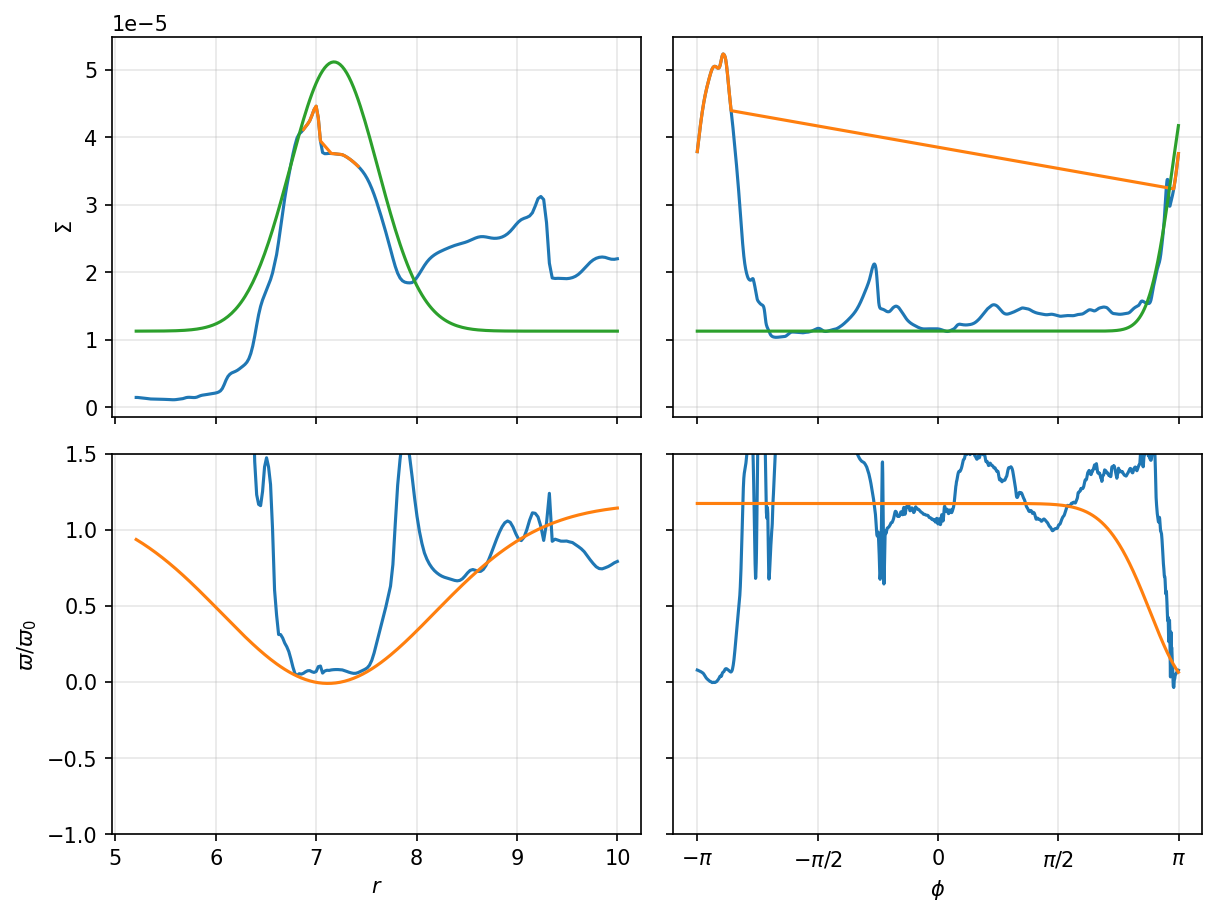

In [46]:
fig, axes = plt.subplots(2,2, dpi=150, figsize=(8,6), constrained_layout=True, sharex="col", sharey="row")
axes = axes.flatten()

# sigma
vals_view = Rho_view
params = popt_rho
c = params[0]
a = params[1]
r0 = params[2]
phi0 = params[3]
wr = params[4]
wphi = params[5]

rs = Xc_view[:,0]
phis = Yc_view[0,:]

indr = int(np.argmin(np.abs(rs - r0)))
indphi = int(np.argmin(np.abs(phis - phi0)))
inds = (indr, indphi)

vals_r = vals_view[:, indphi]
vals_phi = vals_view[indr, :]

ax = axes[0]
ax.plot(rs, vals_r)
ax.plot(rs[mask_r], vals_r[mask_r])
ax.plot(rs, gauss(rs, c, a, r0, wr))
ax.set_ylabel(r"$\Sigma$")

ax = axes[1]
ax.plot(phis, vals_phi)
plot_periodic(ax, phis[mask_phi], vals_phi[mask_phi])
plot_periodic(ax, phis, gauss(phis, c, a, phi0, wphi))



# vortensity
# sigma
vals_view = vortensity_view
params = popt_vort
c = params[0]
a = params[1]
r0 = params[2]
phi0 = params[3]
wr = params[4]
wphi = params[5]

rs = Xc_view[:,0]
phis = Yc_view[0,:]

indr = int(np.argmin(np.abs(rs - r0)))
indphi = int(np.argmin(np.abs(phis - phi0)))
inds = (indr, indphi)

vals_r = vals_view[:, indphi]
vals_phi = vals_view[indr, :]

ax = axes[2]
ax.plot(rs, vals_r)
ax.plot(rs, gauss(rs, c, a, r0, wr))
ax.set_ylabel(r"$\varpi/\varpi_0$")
ax.set_xlabel(r"$r$")

ax = axes[3]
ax.plot(phis, vals_phi)
ax.plot(phis, gauss(phis, c, a, phi0, wphi))
ax.set_ylim(-1, 1.5)
ax.set_xlabel(r"$\phi$")
ax.set_xticks([-np.pi, -0.5*np.pi, 0, 0.5*np.pi, np.pi])
ax.set_xticklabels([r"$-\pi$", r"$-\pi/2$", "0", r"$\pi/2$", r"$\pi$"])

for ax in axes:
    ax.grid(alpha=0.3)
